#**MIT License**

Copyright (c) 2023 Nishank Dave

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#**Abstract:** 

For this Machine Learning project, we will use the “Walmart Recruiting — Store Sales Forecasting” dataset, from Kaggle.

The goal is to predict the Weekly Sales for specific stores, departments and dates.

link:- https://www.kaggle.com/datasets/tanujdhiman/walmart-analysis-dataset?select=myCity.csv
#**Aim:**

In this assignment we aim to create a complete ML project with

* Checking Data Quality
* Feature Selection
* Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
* Model Interpretibility
* Reports and Visualizations

#**Variable Description**
**1. Store** — the store number

**2. Dept** — the department number

**3. Date** — the week

**4. Weekly_Sales** — sales for the given department in the given store

**5. IsHoliday** — whether the week is a special holiday week

**6. Temperature** — average temperature in the region.

**7. Fuel_Price** — cost of fuel in the region.

**8. MarkDown1–5** — anonymized data related to promotional markdowns that Walmart is running. 

**9. CPI** — the consumer price index.

**10. Unemployment** — the unemployment rate.


**Note:-** MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

In [2]:
##Installing all the required libraries for the Assignment

!pip install fitter
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install -U scikit-learn
!pip install probatus==1.7.0
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install PartialDependenceDisplay


import csv
import json
import logging
import optparse
import os
import random
import sys
import time
import missingno as msno
from datetime import datetime
from distutils.util import strtobool
from fitter import Fitter
from fitter import get_common_distributions, get_distributions

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns 
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)
sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=3cf31d15b97e48851ee3b32184fa90e2f4ff02bc86ad2760bd7d24838ae6ccda
  Stored in directory: /root/.cache/pip/wheels/2f/4b/12/1c9085f8ecb92805ca8645ab9c61703a2874685a9fb87b0bdb
Successfully built fitter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=7cbbbf657e3f1433437cdbadfa53fe9281384ca93120f553dda0d87e782abcde
  Stored in directory: /roo

#**What question are you trying to answer? How did you frame it as an ML task?**
* Here I am trying to predict the Weekly Sales for specific stores, departments and dates.
* A good starting point for evaluating the performance of a predictive model would be to establish a baseline performance metric. This could be achieved by using simple models or heuristics, such as predicting the average sales for each store and department, and then evaluating the performance of more complex models against this baseline.

#**What is human-level performance on that task? What level of performance is needed?**
* Determining human-level performance or the required level of performance for predicting weekly sales for specific stores, departments, and dates would depend on several factors such as the specific context, the available data, and the complexity of the task.
* Another approach would be to compare the performance of the model against the performance of a human expert in making similar predictions. This could be achieved by collecting data on the predictions made by human experts in a similar task, and then comparing the performance of the model to the performance of the human experts.
* It is worth noting that achieving human-level performance on a predictive task can be challenging, especially when the task involves complex patterns or relationships within the data. However, with careful feature engineering, model selection, and tuning, it is often possible to achieve high levels of predictive accuracy that can provide significant business value.

In [3]:
# Reading Data into Pandas Dataframe
url = 'https://raw.githubusercontent.com/Nishank-NEU/Data-Science/main/walmartSample.csv'
data = pd.read_csv(url, encoding='unicode_escape')  # This code will read the CSV file from the URL provided, and store it in a pandas DataFrame called df.

In [4]:
data.head(5)
#The head() method is used to display the first 5 rows of the dataset.

,Unnamed: 0,X,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,202017,202017,21,2011-02-25,False,36,1025.00,61.27,3.065,NaN,NaN,NaN,NaN,NaN,213.190421,8.028,B,140167
1,165520,165520,17,2012-03-02,False,31,1236.64,26.28,3.242,14469.08,1163.89,37.38,8771.3,2237.79,130.645793,6.403,B,93188
2,389207,389207,41,2011-12-02,False,94,37971.00,34.53,3.378,4594.56,305.47,1781.24,3168.1,21739.26,195.822329,6.759,A,196321
3,133193,133193,14,2011-05-06,False,67,26400.02,58.21,4.046,NaN,NaN,NaN,NaN,NaN,185.937438,8.521,A,200898
4,401356,401356,43,2010-10-08,False,1,8748.54,72.81,2.633,NaN,NaN,NaN,NaN,NaN,203.665179,10.210,C,41062


#**Where did the feature data and label come from?**
We can identify the following feature and input variables:
* Store
* Dept
* Date
* IsHoliday
* Type
* Size
* Temperature
* Fuel_Price
* MarkDown1
* MarkDown2
* MarkDown3
* MarkDown4
* MarkDown5
* CPI
* Unemployment
*The Target variable is Weekly_Sales

#**Exploratory Data Analysis**

In [5]:
# Checking Data Type of each variable
data.info()
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
numeric_data.shape[1]
categorical_data.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    500 non-null    int64  
 1   X             500 non-null    int64  
 2   Store         500 non-null    int64  
 3   Date          500 non-null    object 
 4   IsHoliday     500 non-null    bool   
 5   Dept          500 non-null    int64  
 6   Weekly_Sales  500 non-null    float64
 7   Temperature   500 non-null    float64
 8   Fuel_Price    500 non-null    float64
 9   MarkDown1     170 non-null    float64
 10  MarkDown2     125 non-null    float64
 11  MarkDown3     155 non-null    float64
 12  MarkDown4     154 non-null    float64
 13  MarkDown5     172 non-null    float64
 14  CPI           500 non-null    float64
 15  Unemployment  500 non-null    float64
 16  Type          500 non-null    object 
 17  Size          500 non-null    int64  
dtypes: bool(1), float64(10), int64

3

# What are the data types? (Only numeric and categorical)
* categorical - 2
* numeric - 15
* boolean - 1

<Axes: >

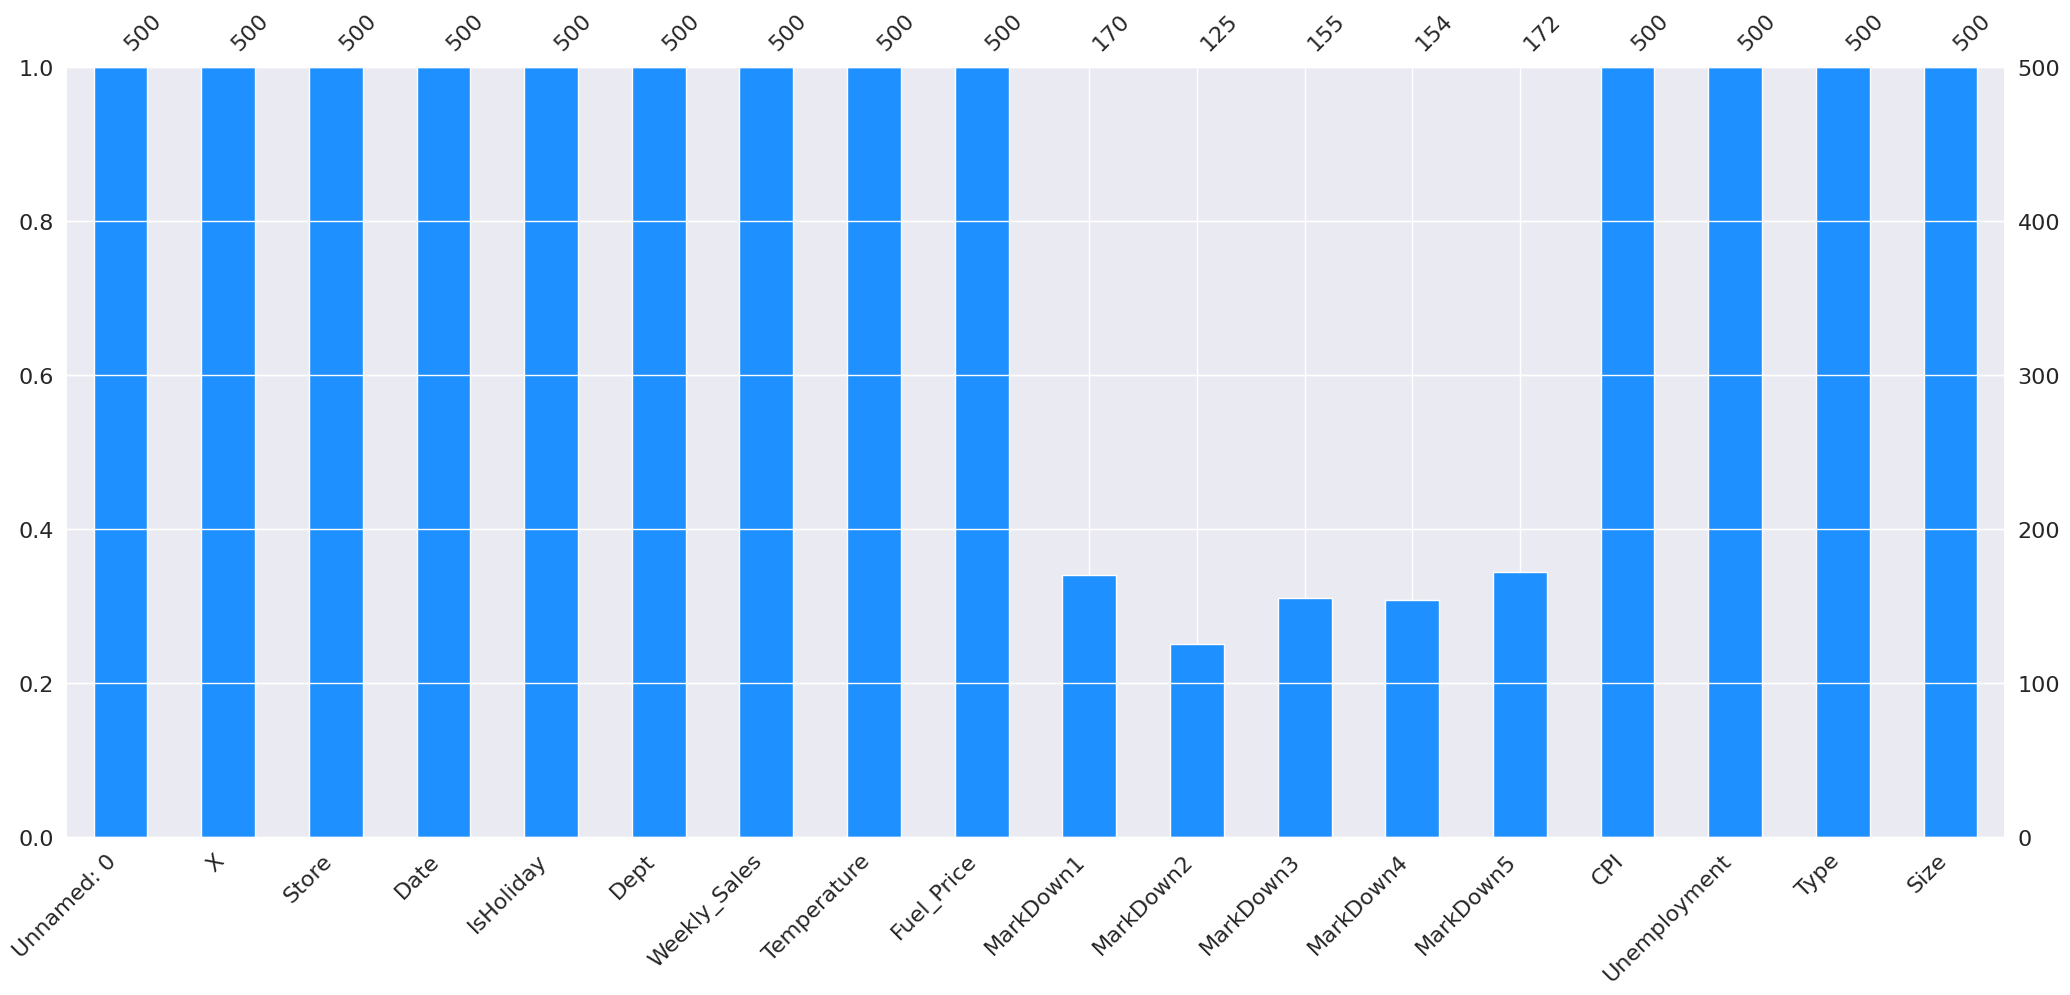

In [6]:
# Checking for any null values in the dataset, as we have null values
data.isnull().sum()
msno.bar(data, color="dodgerblue")

#Are there missing values?
* Yes the missing values are in MarkDown1-5
and the missing value is marked with an NA.

# Dropping table- 
* Date, CPI, Fuel_Price, Unemployment, Temperature

# Removing Null values

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.isocalendar().week
data = data.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

In [9]:
df = data.pop('Weekly_Sales')
data['Weekly_Sales'] = df
data

,Unnamed: 0,X,Store,IsHoliday,Dept,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Year,Month,Week,Weekly_Sales
0,202017,202017,21,False,36,0.00,0.00,0.00,0.00,0.00,B,140167,2011,2,8,1025.00
1,165520,165520,17,False,31,14469.08,1163.89,37.38,8771.30,2237.79,B,93188,2012,3,9,1236.64
2,389207,389207,41,False,94,4594.56,305.47,1781.24,3168.10,21739.26,A,196321,2011,12,48,37971.00
3,133193,133193,14,False,67,0.00,0.00,0.00,0.00,0.00,A,200898,2011,5,18,26400.02
4,401356,401356,43,False,1,0.00,0.00,0.00,0.00,0.00,C,41062,2010,10,40,8748.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,172845,172845,18,False,36,0.00,0.00,0.00,0.00,0.00,B,120653,2011,6,23,5338.50
496,154839,154839,16,False,4,516.47,61.00,944.52,9.00,7124.75,B,57197,2011,12,48,13876.12
497,197058,197058,20,False,48,6569.40,605.70,0.00,561.31,4567.03,A,203742,2012,6,26,1034.00
498,149126,149126,16,False,18,0.00,0.00,0.00,0.00,0.00,B,57197,2010,4,13,3943.81


In [10]:
# Shape of the dataframe - Here, we have 500 samples of data with 16 predictors and 1 result
data.shape

(500, 16)

In [11]:
data.isnull().sum()

Unnamed: 0      0
X               0
Store           0
IsHoliday       0
Dept            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Type            0
Size            0
Year            0
Month           0
Week            0
Weekly_Sales    0
dtype: int64

In [12]:
#Creating binary vaiables for weekly_sales 

data = pd.get_dummies(data)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Weekly_Sales']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Weekly_Sales']] = pd.DataFrame(x_scaled)

In [13]:
data.head()

,Unnamed: 0,X,Store,IsHoliday,Dept,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Year,Month,Week,Weekly_Sales,Type_A,Type_B,Type_C
0,202017,202017,21,False,36,0.00,0.00,0.00,0.0,0.00,140167,2011,2,8,0.004548,0,1,0
1,165520,165520,17,False,31,14469.08,1163.89,37.38,8771.3,2237.79,93188,2012,3,9,0.005488,0,1,0
2,389207,389207,41,False,94,4594.56,305.47,1781.24,3168.1,21739.26,196321,2011,12,48,0.168639,1,0,0
3,133193,133193,14,False,67,0.00,0.00,0.00,0.0,0.00,200898,2011,5,18,0.117248,1,0,0
4,401356,401356,43,False,1,0.00,0.00,0.00,0.0,0.00,41062,2010,10,40,0.038851,0,0,1


In [14]:
columns = list(data.columns)
print(columns)  # Name of all predictors and result

['Unnamed: 0', 'X', 'Store', 'IsHoliday', 'Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size', 'Year', 'Month', 'Week', 'Weekly_Sales', 'Type_A', 'Type_B', 'Type_C']


Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.99it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
uniform      9.300393e-11  2594.536952 -14644.064519     inf      0.032682   
powerlaw     9.554770e-11  2597.544166 -14624.358004     inf      0.048326   
rayleigh     1.574538e-10  2625.031889 -14380.819287     inf      0.061152   
lognorm      1.650305e-10  2632.102014 -14351.105488     inf      0.064253   
gamma        1.651933e-10  2631.882248 -14350.612664     inf      0.065413   

          ks_pvalue  
uniform    0.647227  
powerlaw   0.187222  
rayleigh   0.045562  
lognorm    0.030803  
gamma      0.026475  


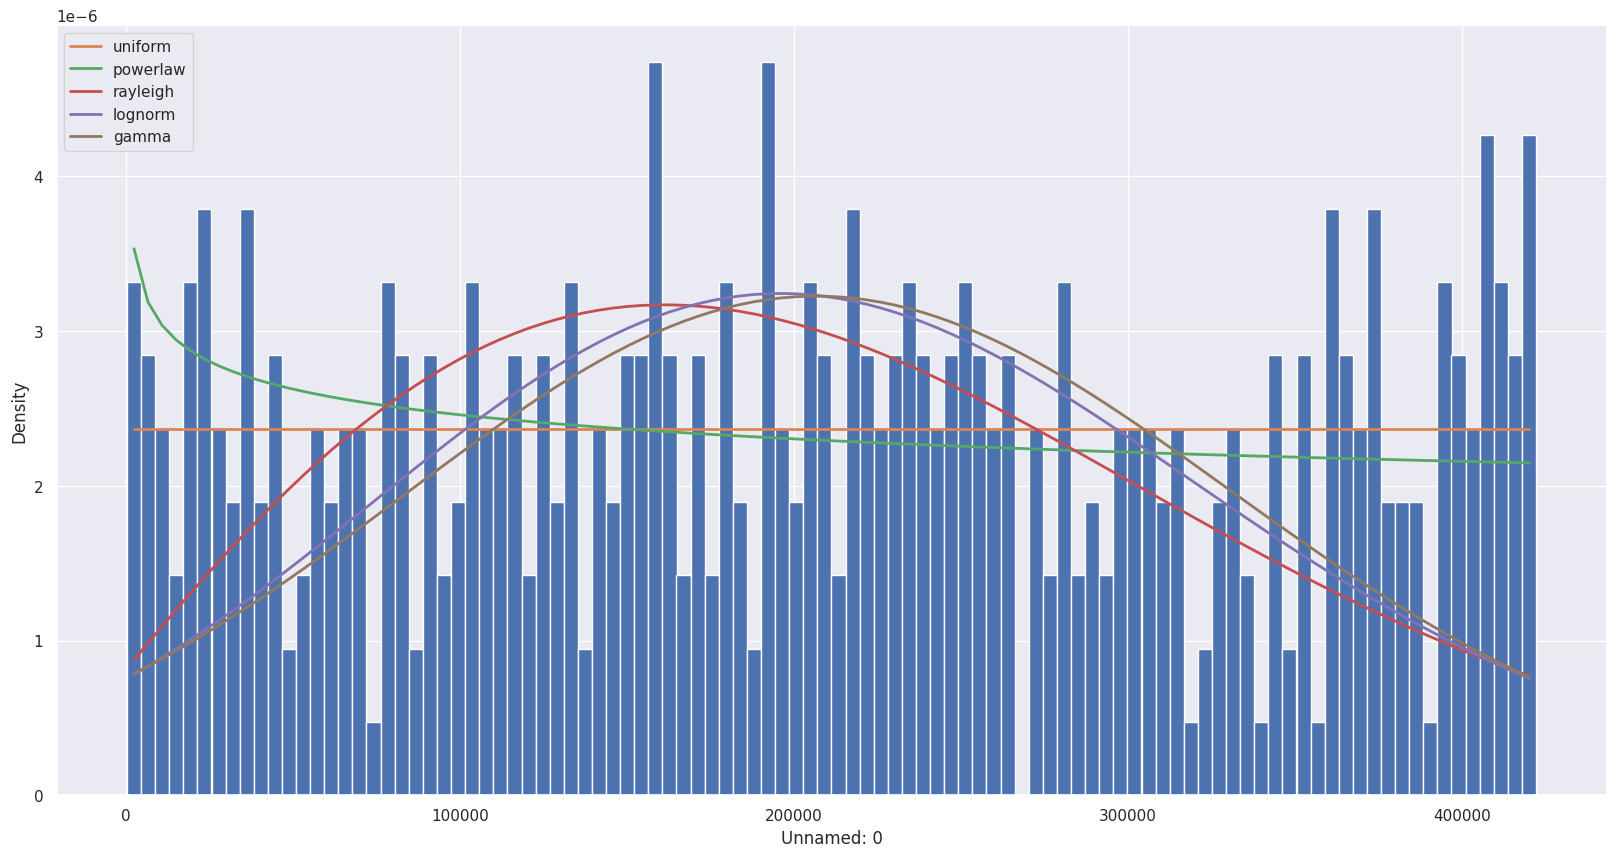

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
uniform      9.300393e-11  2594.536952 -14644.064519     inf      0.032682   
powerlaw     9.554770e-11  2597.544166 -14624.358004     inf      0.048326   
rayleigh     1.574538e-10  2625.031889 -14380.819287     inf      0.061152   
lognorm      1.650305e-10  2632.102014 -14351.105488     inf      0.064253   
gamma        1.651933e-10  2631.882248 -14350.612664     inf      0.065413   

          ks_pvalue  
uniform    0.647227  
powerlaw   0.187222  
rayleigh   0.045562  
lognorm    0.030803  
gamma      0.026475  


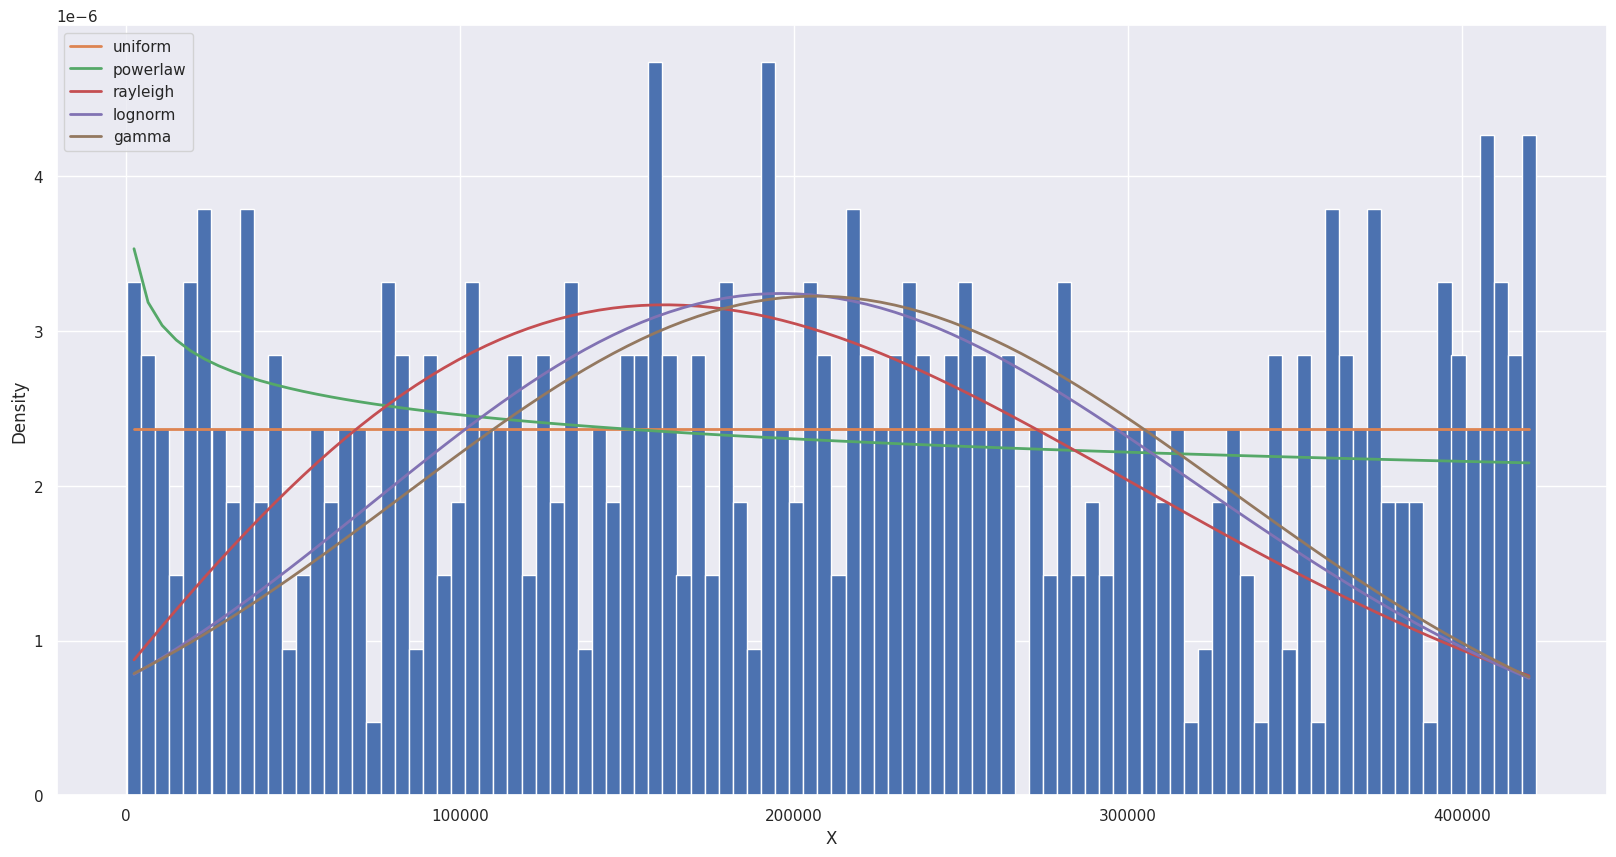

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.85it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
uniform          0.072645  760.837927 -4405.962750     inf      0.071818   
rayleigh         0.078031  791.923132 -4370.201487     inf      0.061331   
chi2             0.078640  799.690469 -4360.095047     inf      0.060636   
gamma            0.078904  798.852008 -4358.420706     inf      0.070144   
norm             0.079141  796.682866 -4363.139238     inf      0.069557   

          ks_pvalue  
uniform    0.010930  
rayleigh   0.044565  
chi2       0.048538  
gamma      0.013883  
norm       0.015077  


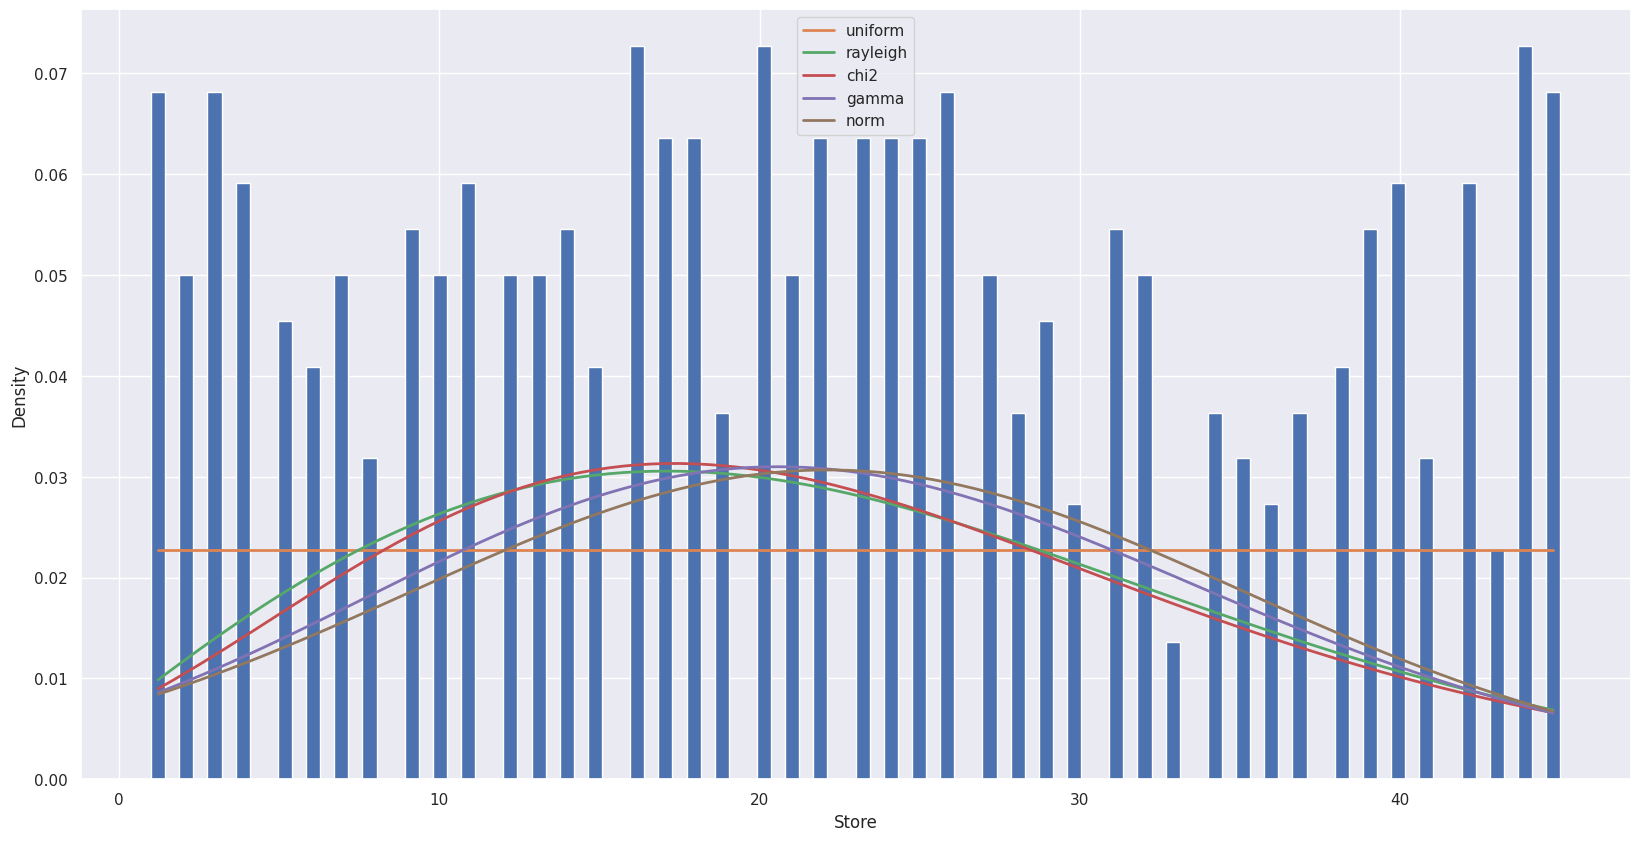

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      4997.841984  630.512327  1169.720523     inf      0.917999   
expon         6996.148689  723.304989  1331.682712     inf      0.918000   
gamma         7401.849730  108.663525  1366.082381     inf      0.918000   
chi2          7613.752252   96.997537  1380.195474     inf      0.918000   
rayleigh      8243.991097  293.300918  1413.745098     inf      0.618092   

              ks_pvalue  
exponpow   0.000000e+00  
expon      0.000000e+00  
gamma      0.000000e+00  
chi2       0.000000e+00  
rayleigh  1.575075e-184  


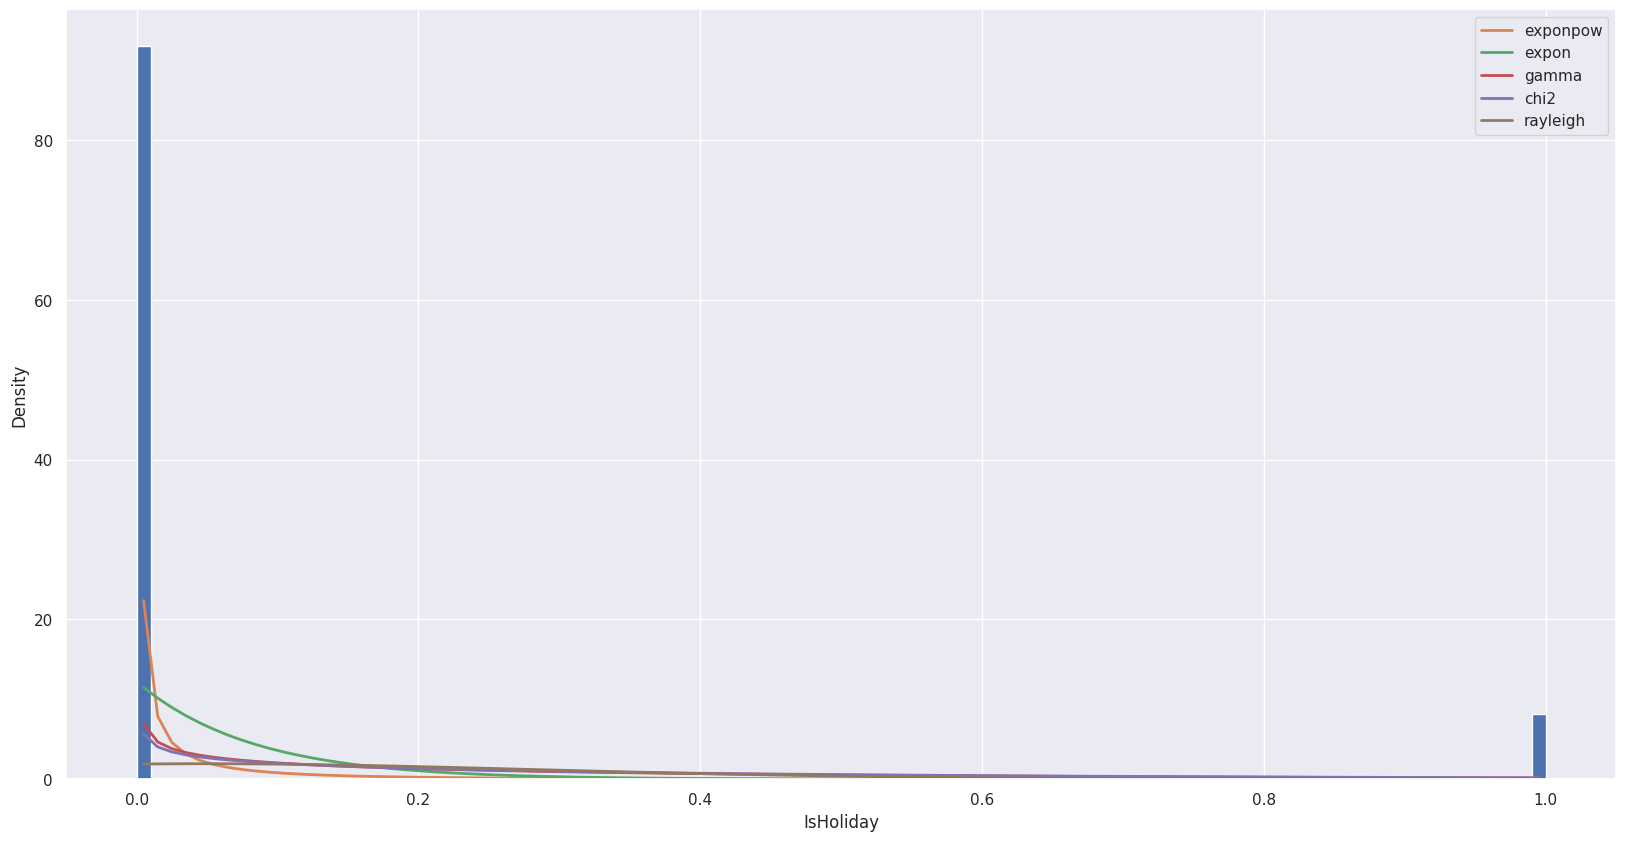

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.62it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow         0.006050  953.615275 -5642.497219     inf      0.081243   
uniform          0.006206  920.993496 -5636.014525     inf      0.153633   
chi2             0.006288  972.750917 -5623.193719     inf      0.079684   
gamma            0.006288  972.750931 -5623.193241     inf      0.079685   
expon            0.006606  984.441863 -5604.766569     inf      0.108909   

             ks_pvalue  
exponpow  2.558658e-03  
uniform   9.031128e-11  
chi2      3.293422e-03  
gamma     3.293135e-03  
expon     1.278658e-05  


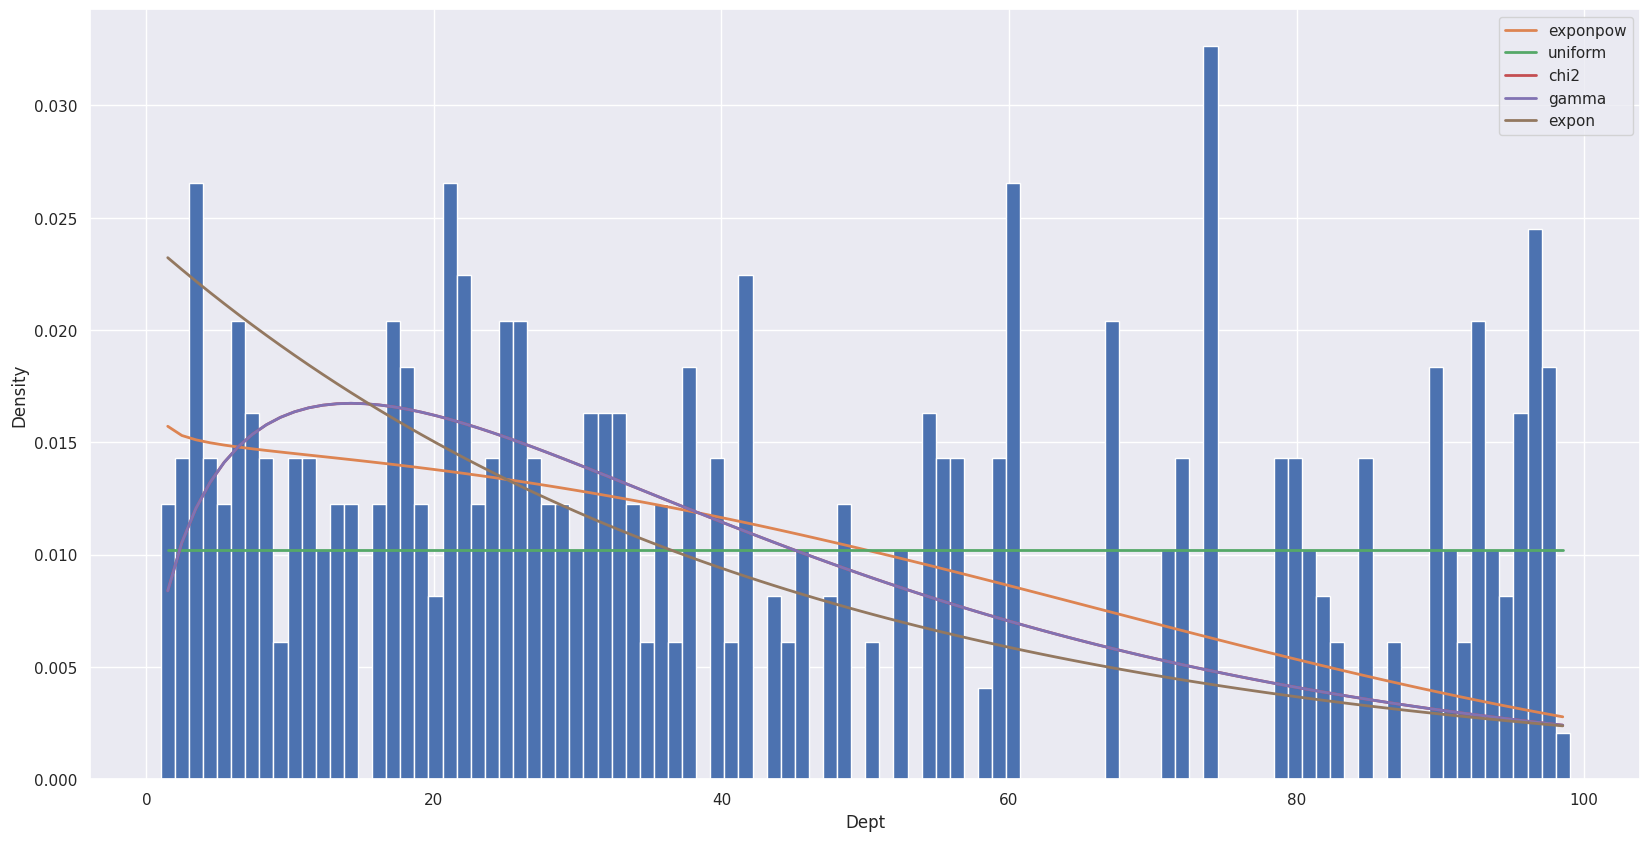

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.21it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
gamma        9.763660e-07  2527.274012 -10008.374371     inf      0.662000   
expon        1.087247e-06  3781.030998  -9960.805590     inf      0.662000   
chi2         1.277068e-06  2459.941825  -9874.131974     inf      0.662000   
exponpow     1.317372e-06  2344.210717  -9858.596120     inf      0.662000   
rayleigh     1.549610e-06  4538.293154  -9783.628415     inf      0.421179   

              ks_pvalue  
gamma     7.990126e-216  
expon     7.990125e-216  
chi2      7.990125e-216  
exponpow  7.990125e-216  
rayleigh   6.371829e-81  


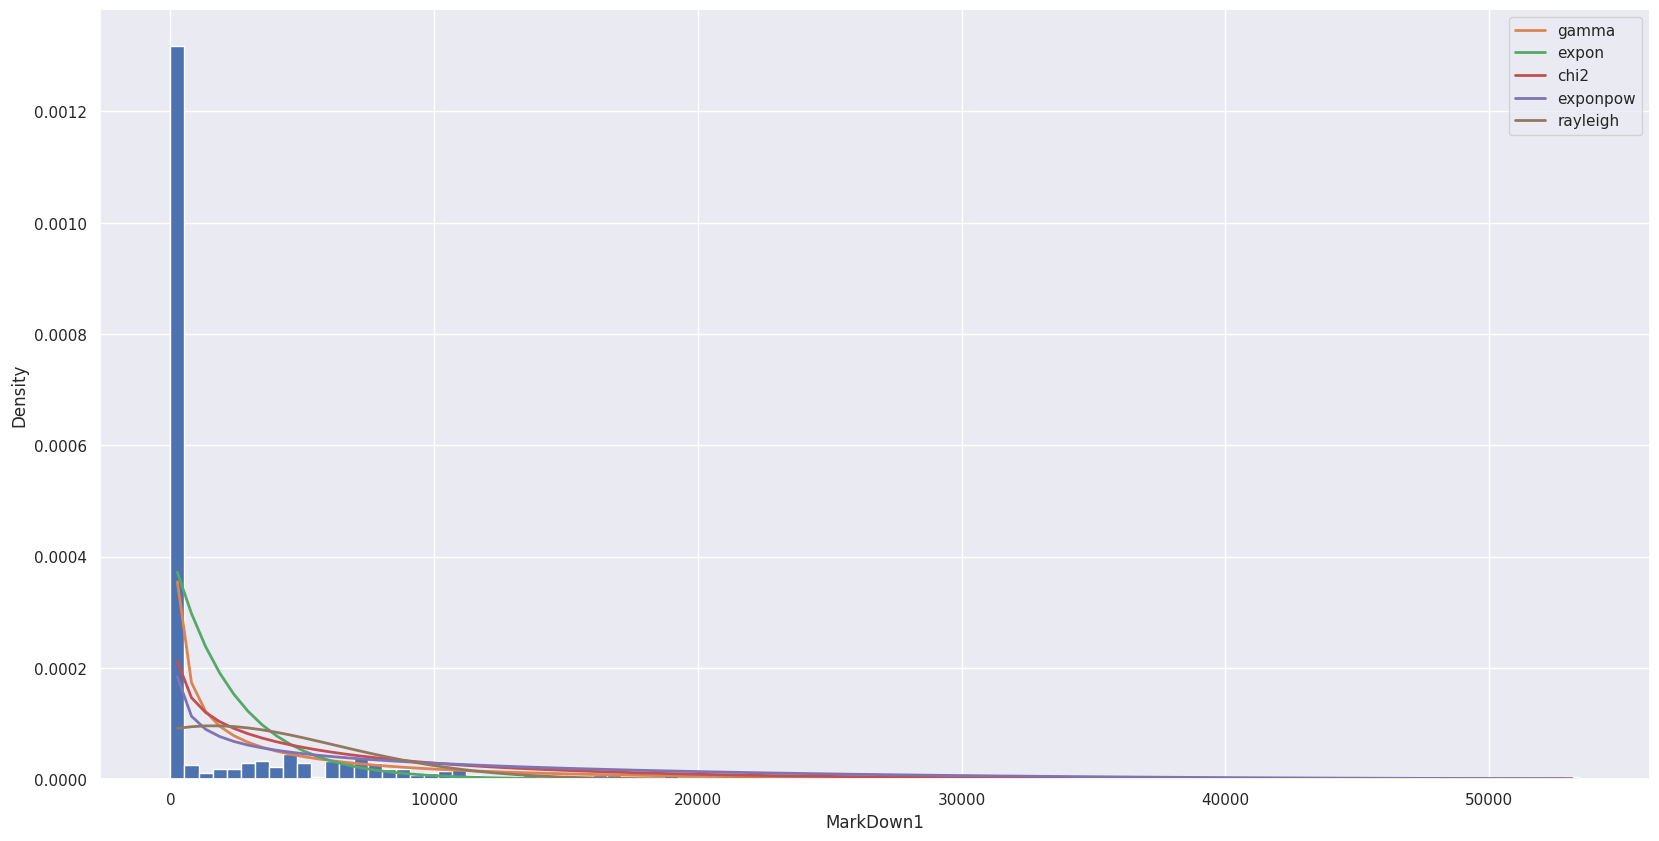

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.78it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon            0.000003  6404.047173 -9386.431661     inf      0.760689   
gamma            0.000006  2526.610182 -9101.327058     inf      0.759750   
chi2             0.000007  2393.879604 -9039.378208     inf      0.792424   
exponpow         0.000007  2246.946770 -9028.145194     inf      0.788254   
rayleigh         0.000008  5316.543776 -8985.699563     inf      0.525285   

              ks_pvalue  
expon     4.333139e-302  
gamma     3.881778e-301  
chi2       0.000000e+00  
exponpow   0.000000e+00  
rayleigh  4.646625e-129  


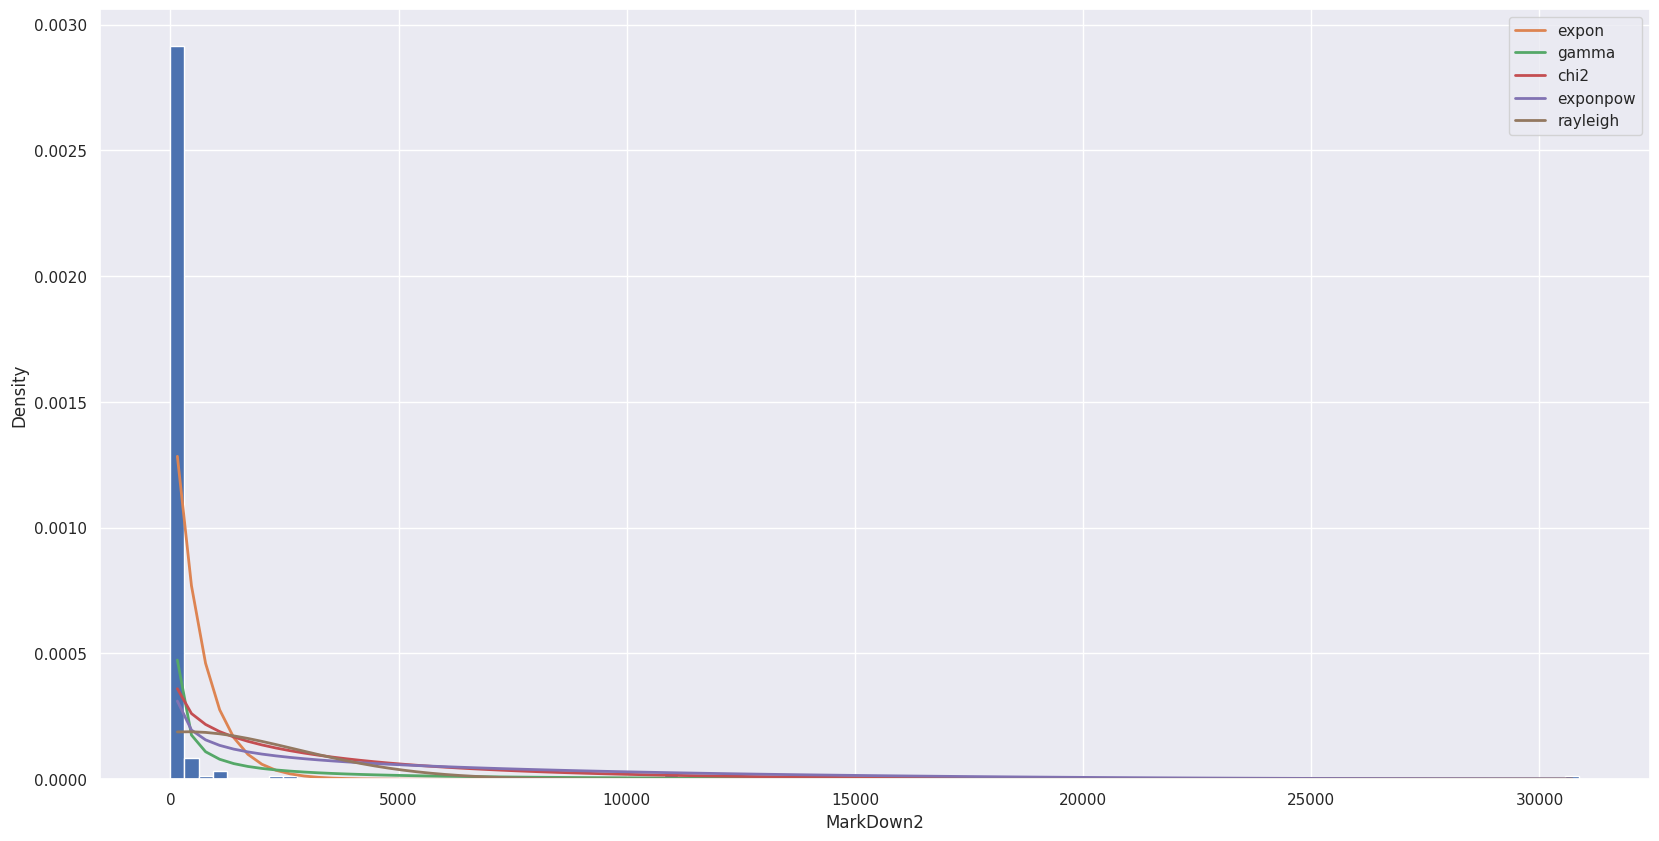

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
expon        3.825848e-07  9169.388392 -10483.032607     inf      0.835789   
gamma        1.040314e-06  2748.258234  -9976.654336     inf      0.709369   
chi2         1.110827e-06  2574.418960  -9943.863004     inf      0.898247   
exponpow     1.117049e-06  2706.582223  -9941.070365     inf      0.708556   
rayleigh     1.230579e-06  5446.032173  -9898.887765     inf      0.576493   

              ks_pvalue  
expon      0.000000e+00  
gamma     4.472058e-254  
chi2       0.000000e+00  
exponpow  2.245849e-253  
rayleigh  5.070870e-158  


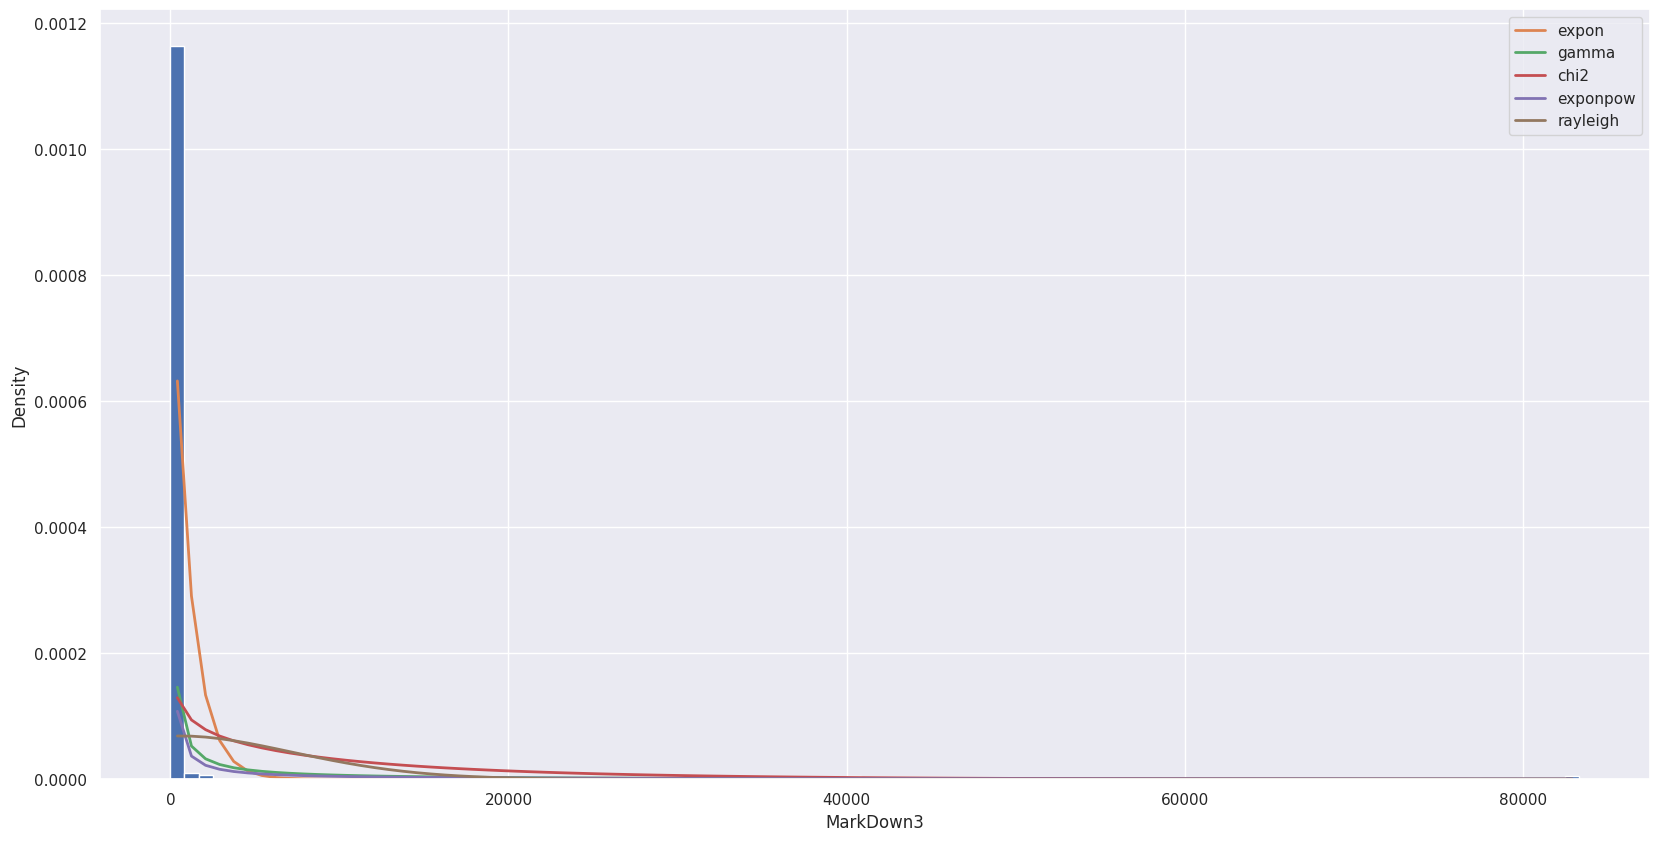

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon        4.692385e-07   7494.843894 -10380.952183     inf      0.692942   
exponpow     1.174667e-06   2501.031616  -9915.922976     inf      0.691990   
chi2         1.202870e-06   2835.039291  -9904.060264     inf      0.692940   
rayleigh     1.454380e-06  10817.608437  -9815.340236     inf      0.417727   
lognorm      1.520877e-06   2934.970054  -9786.771936     inf      0.692000   

              ks_pvalue  
expon     3.168604e-240  
exponpow  1.922541e-239  
chi2      3.179329e-240  
rayleigh   1.503686e-79  
lognorm   1.885797e-239  


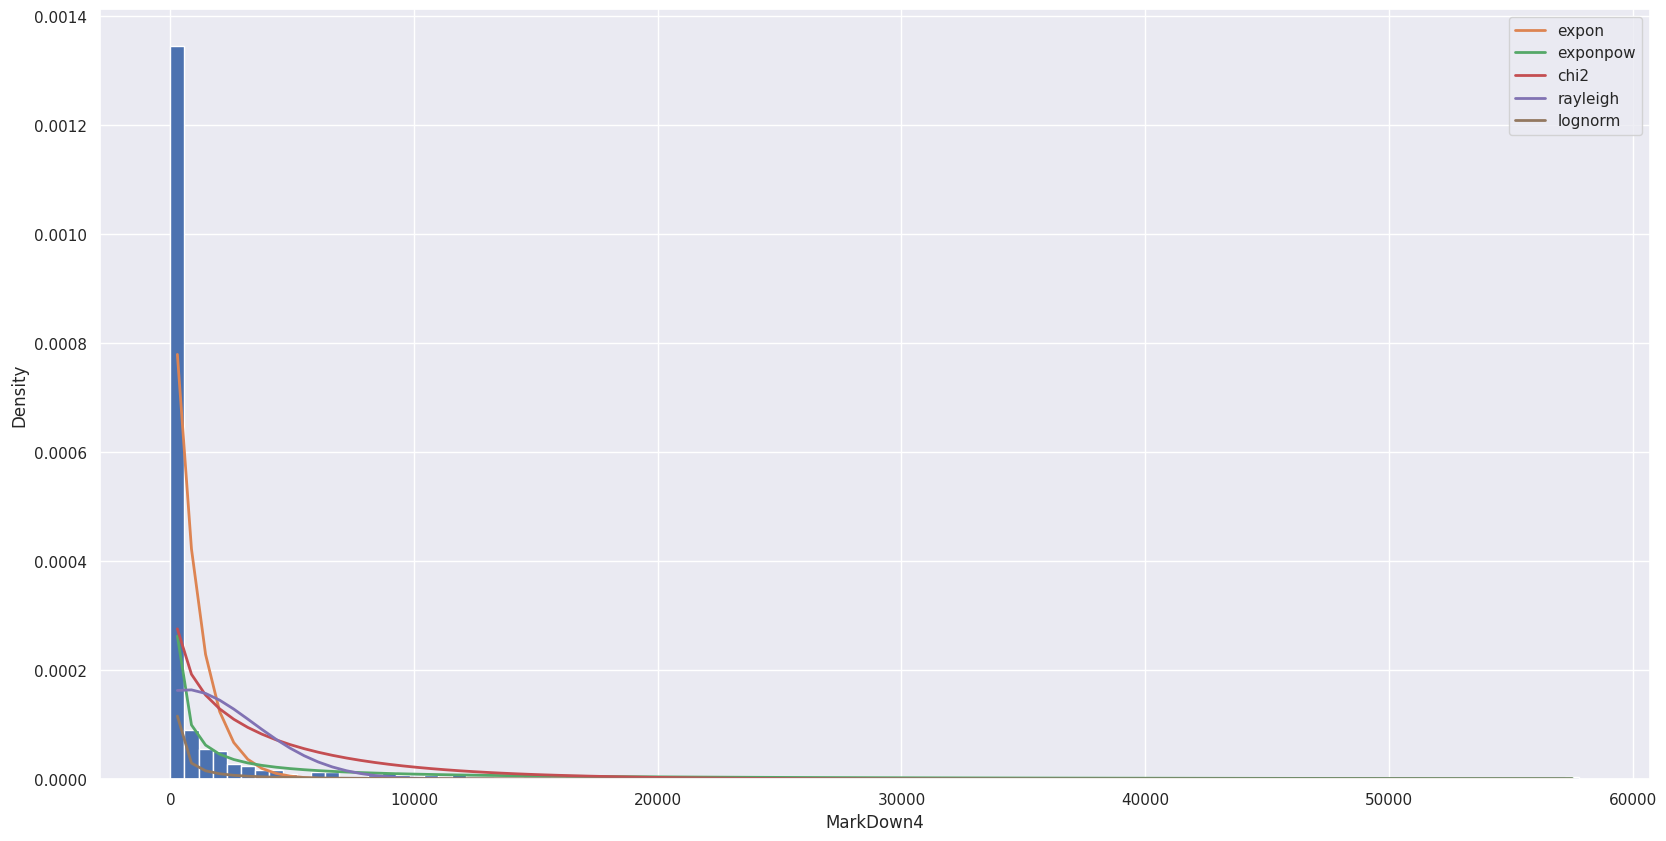

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.20it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000003  2334.213208 -9415.790321     inf      0.656000   
exponpow         0.000003  2348.000380 -9414.795045     inf      0.655997   
expon            0.000004  3208.149967 -9345.787981     inf      0.656000   
chi2             0.000004  2268.918921 -9290.232273     inf      0.656000   
lognorm          0.000005  2649.915943 -9202.591180     inf      0.615487   

              ks_pvalue  
gamma     2.503070e-211  
exponpow  2.514521e-211  
expon     2.503070e-211  
chi2      2.503070e-211  
lognorm   8.757431e-183  


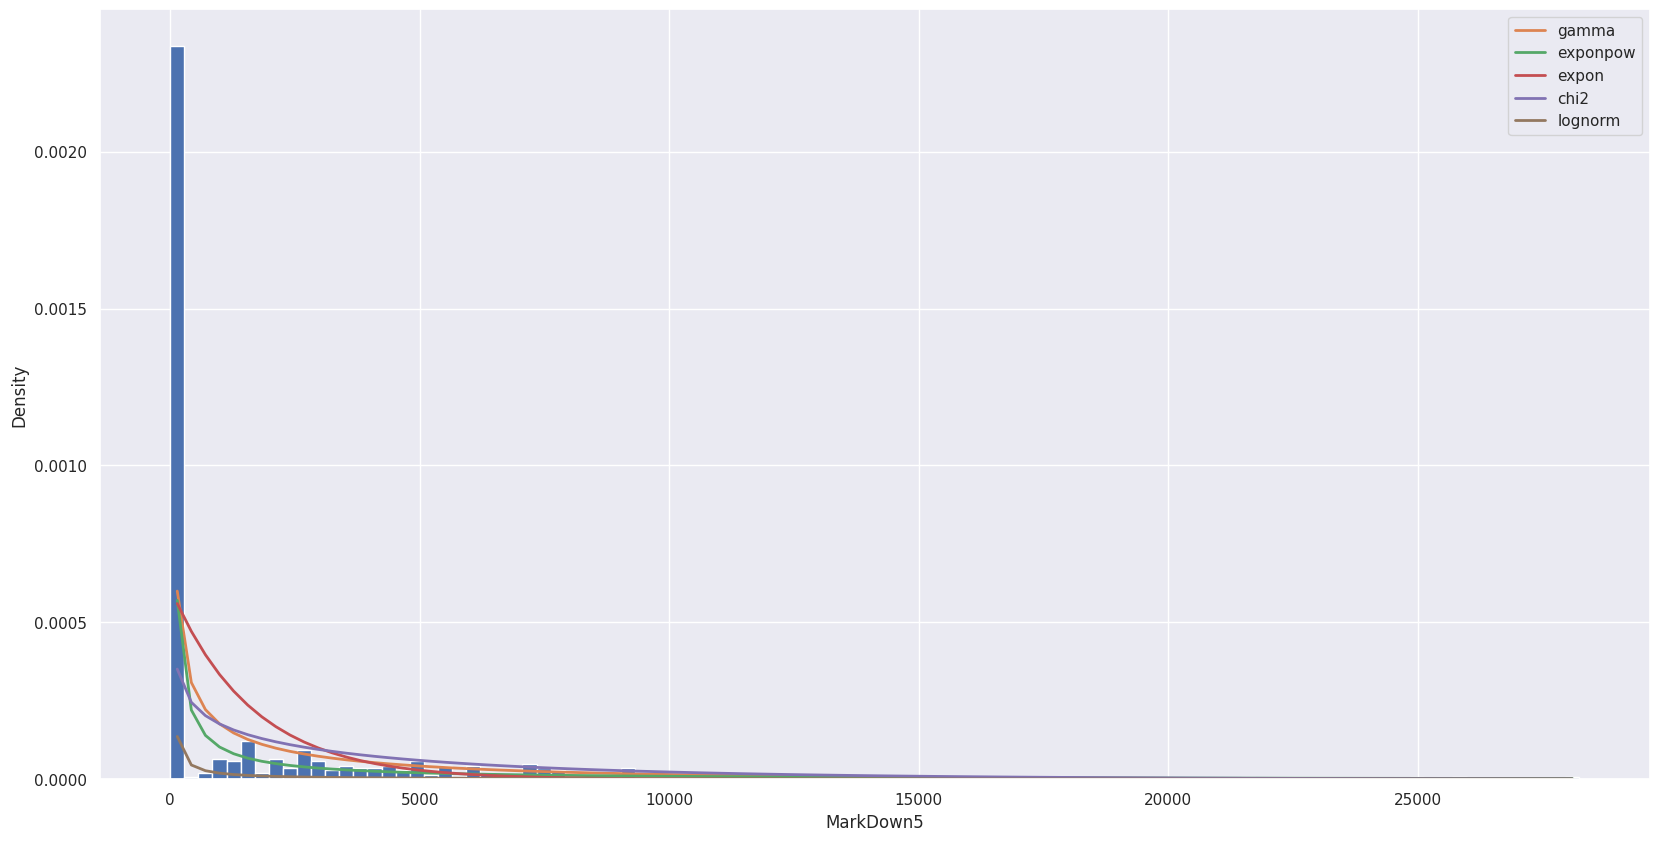

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
uniform      1.430938e-08  2429.348520 -12126.050062     inf      0.196651   
powerlaw     1.454086e-08  2460.155135 -12111.811934     inf      0.317993   
norm         1.496324e-08  2468.950640 -12103.709645     inf      0.164095   
gamma        1.497634e-08  2470.926491 -12097.057350     inf      0.162096   
expon        1.501316e-08  2491.106206 -12102.044234     inf      0.246550   

             ks_pvalue  
uniform   2.036379e-17  
powerlaw  1.848975e-45  
norm      3.112707e-12  
gamma     6.027318e-12  
expon     2.967798e-27  


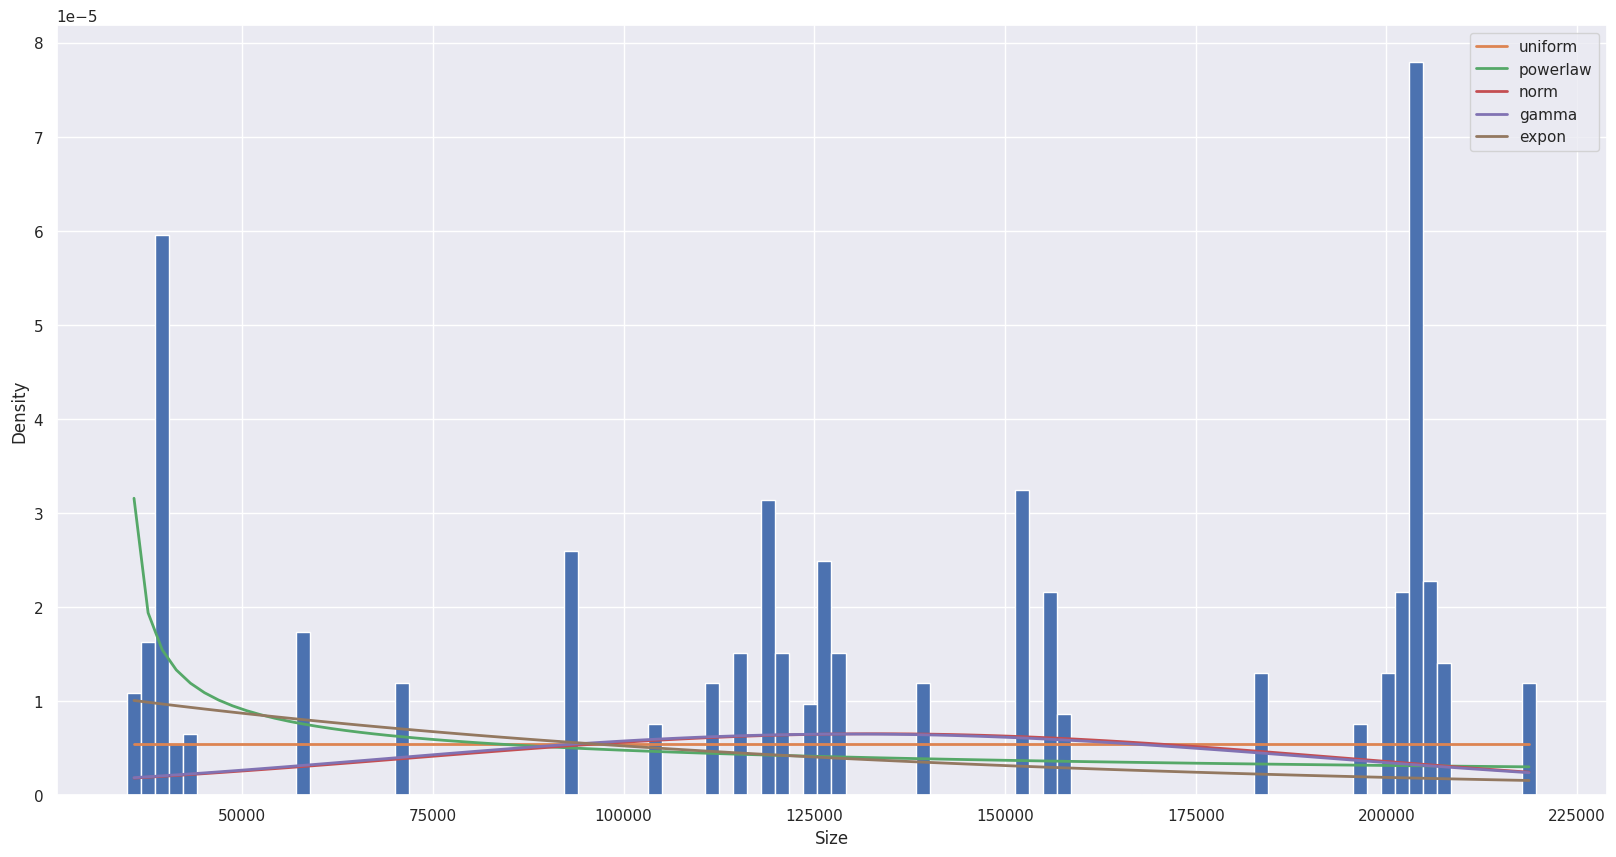

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow       660.998960  368.051450  158.215909     inf      0.437298   
powerlaw       681.601452  439.765698  173.562328     inf      0.583863   
lognorm        698.272275  545.625324  185.644327     inf      0.357071   
chi2           736.559951  258.042386  212.335091     inf      0.354000   
expon          816.193195  204.606513  257.450710     inf      0.354000   

              ks_pvalue  
exponpow   1.629059e-87  
powerlaw  1.636391e-162  
lognorm    1.450808e-57  
chi2       1.478517e-56  
expon      1.478182e-56  


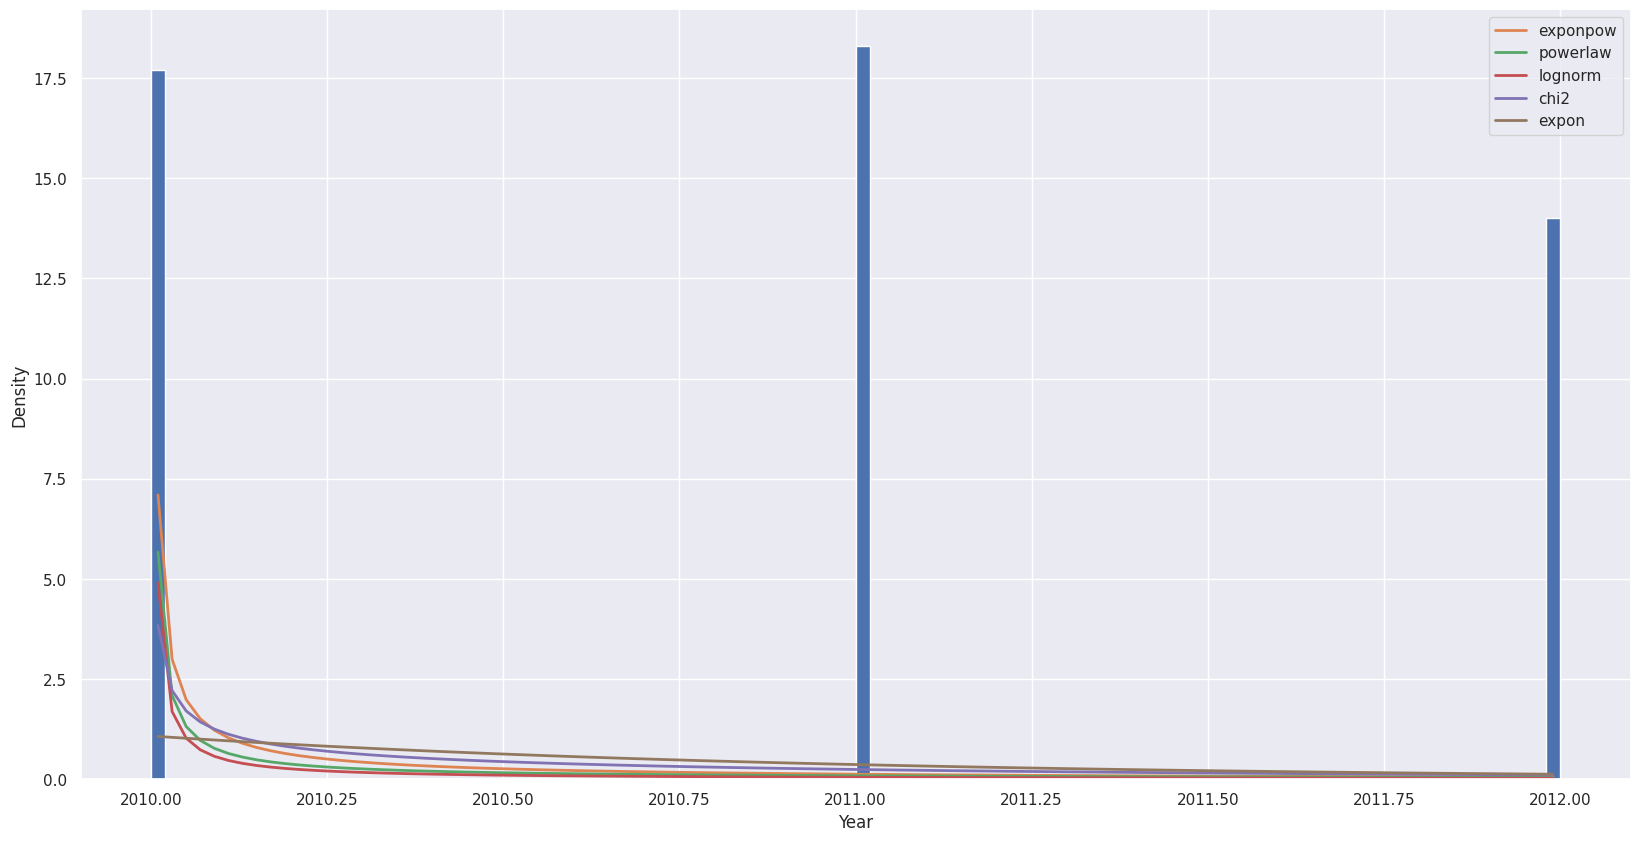

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.25it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
uniform          6.567934  483.579055 -2153.775180     inf      0.080545   
exponpow         6.592722  505.514136 -2145.677069     inf      0.080847   
rayleigh         6.603865  514.036252 -2151.047300     inf      0.092096   
chi2             6.613187  521.417666 -2144.127406     inf      0.094299   
lognorm          6.615194  521.445554 -2143.975663     inf      0.093393   

          ks_pvalue  
uniform    0.002866  
exponpow   0.002729  
rayleigh   0.000385  
chi2       0.000255  
lognorm    0.000302  


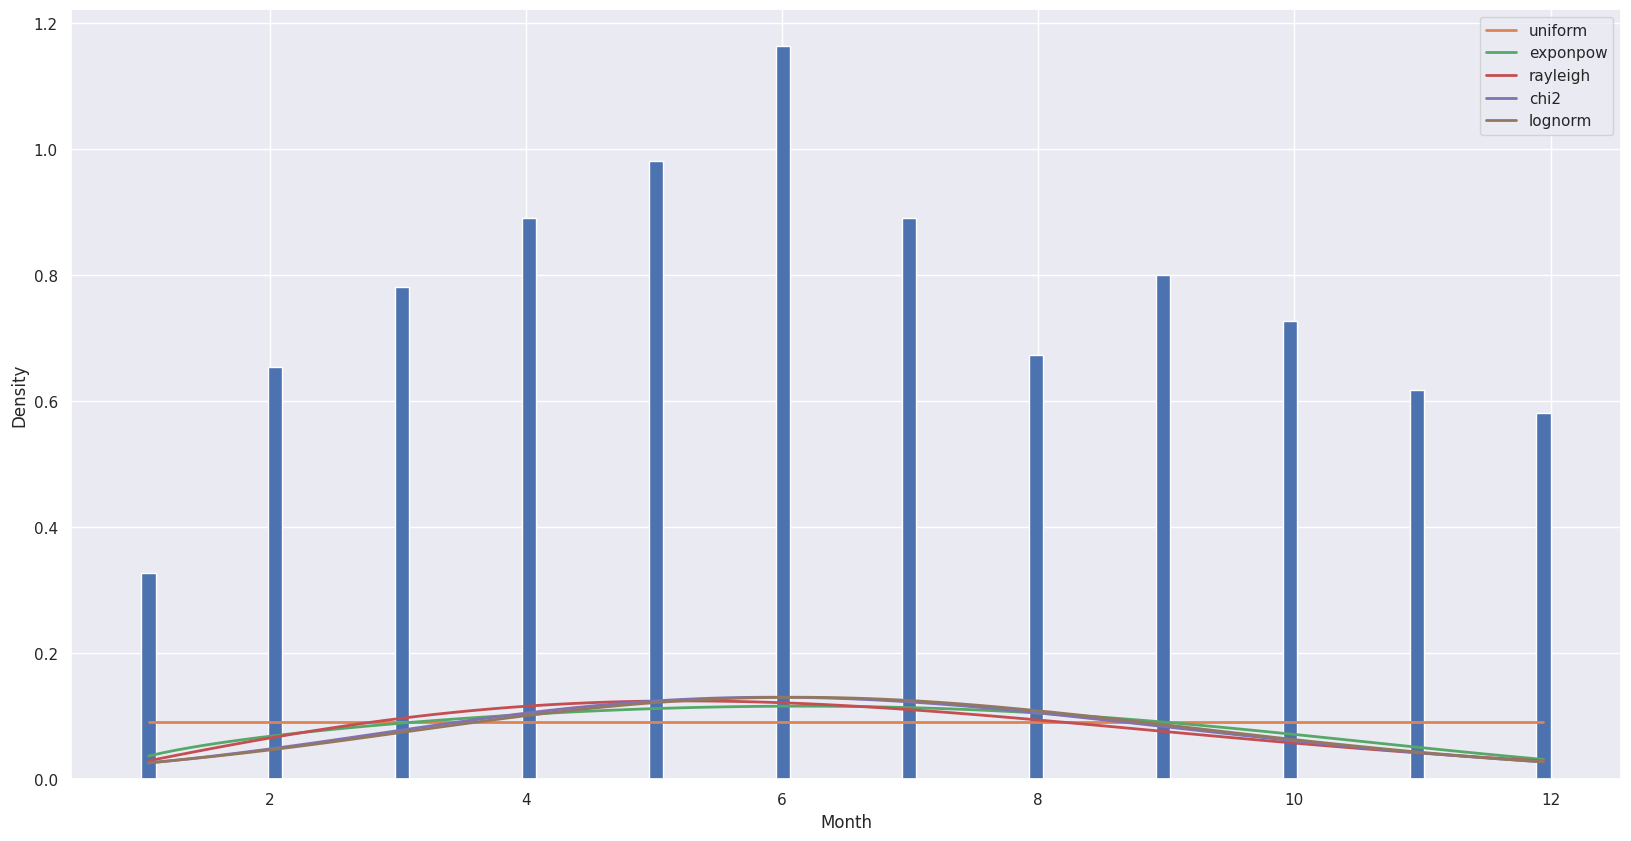

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.06it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
uniform          0.044906  790.365127 -4646.468931     inf      0.058902   
rayleigh         0.045126  822.284802 -4644.018913     inf      0.067076   
chi2             0.045574  829.851537 -4632.866705     inf      0.062637   
gamma            0.045707  829.485056 -4631.413690     inf      0.055756   
norm             0.045833  827.315267 -4636.245175     inf      0.052454   

          ks_pvalue  
uniform    0.059800  
rayleigh   0.021210  
chi2       0.037864  
gamma      0.085984  
norm       0.123202  


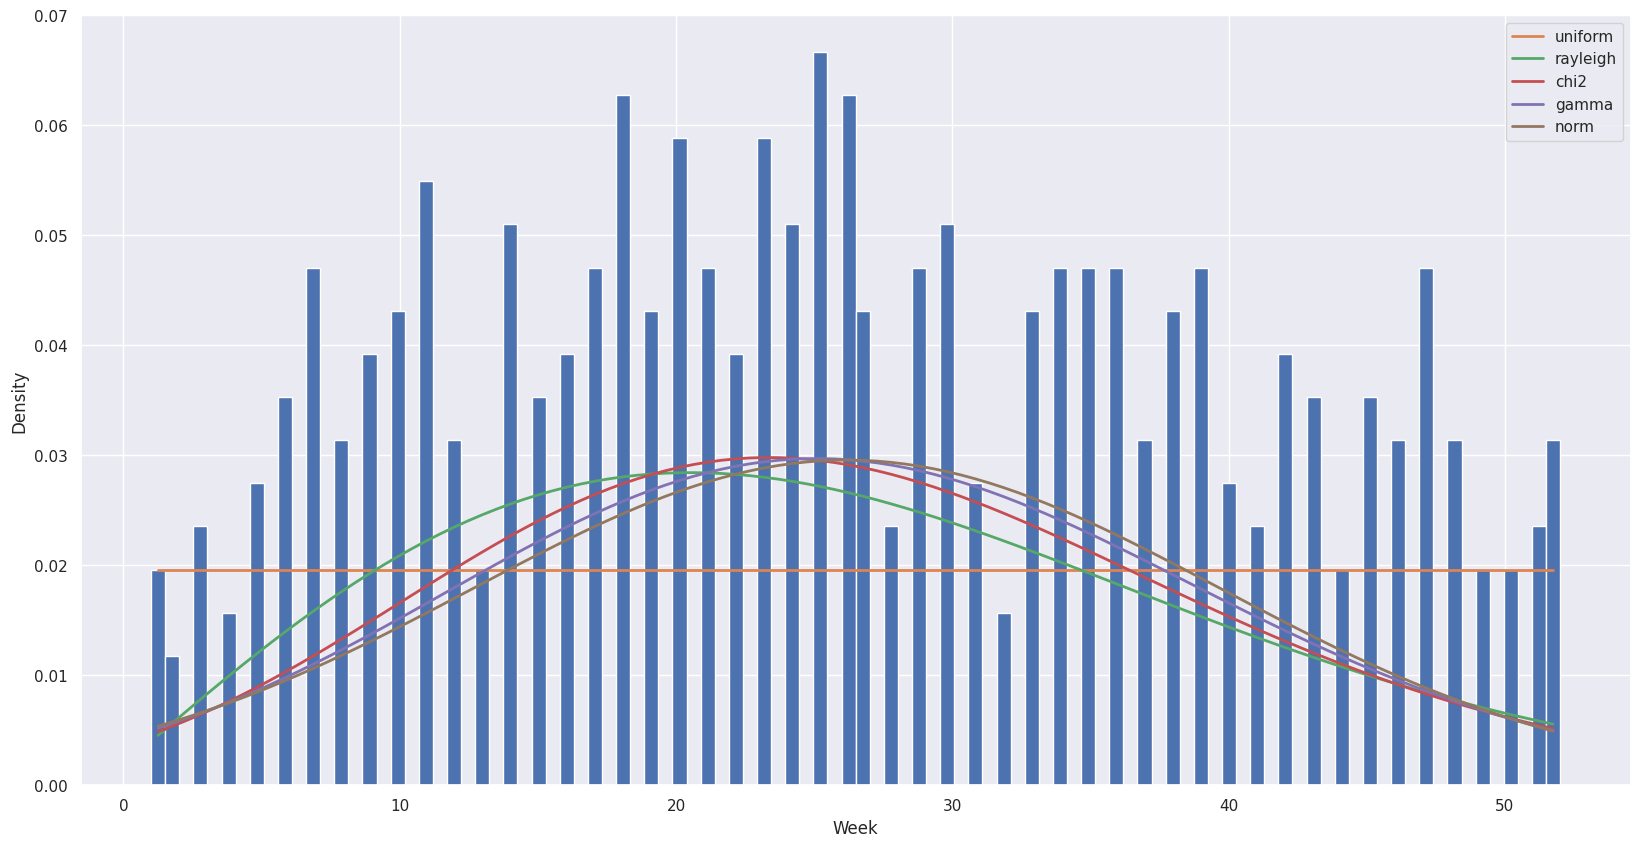

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.38it/s]


          sumsquare_error           aic          bic  kl_div  ks_statistic  \
expon         3452.560366  48761.078380   978.560852     inf      0.998000   
chi2          6996.650430    902.583568  1337.933177     inf      0.998000   
exponpow      7420.110910   3417.977465  1367.314417     inf      0.998000   
rayleigh      7902.133581  17153.133799  1392.569205     inf      0.618246   
norm          8513.465884  16165.775995  1429.827372     inf      0.515853   

              ks_pvalue  
expon      0.000000e+00  
chi2       0.000000e+00  
exponpow   0.000000e+00  
rayleigh  1.240356e-184  
norm      3.950657e-124  


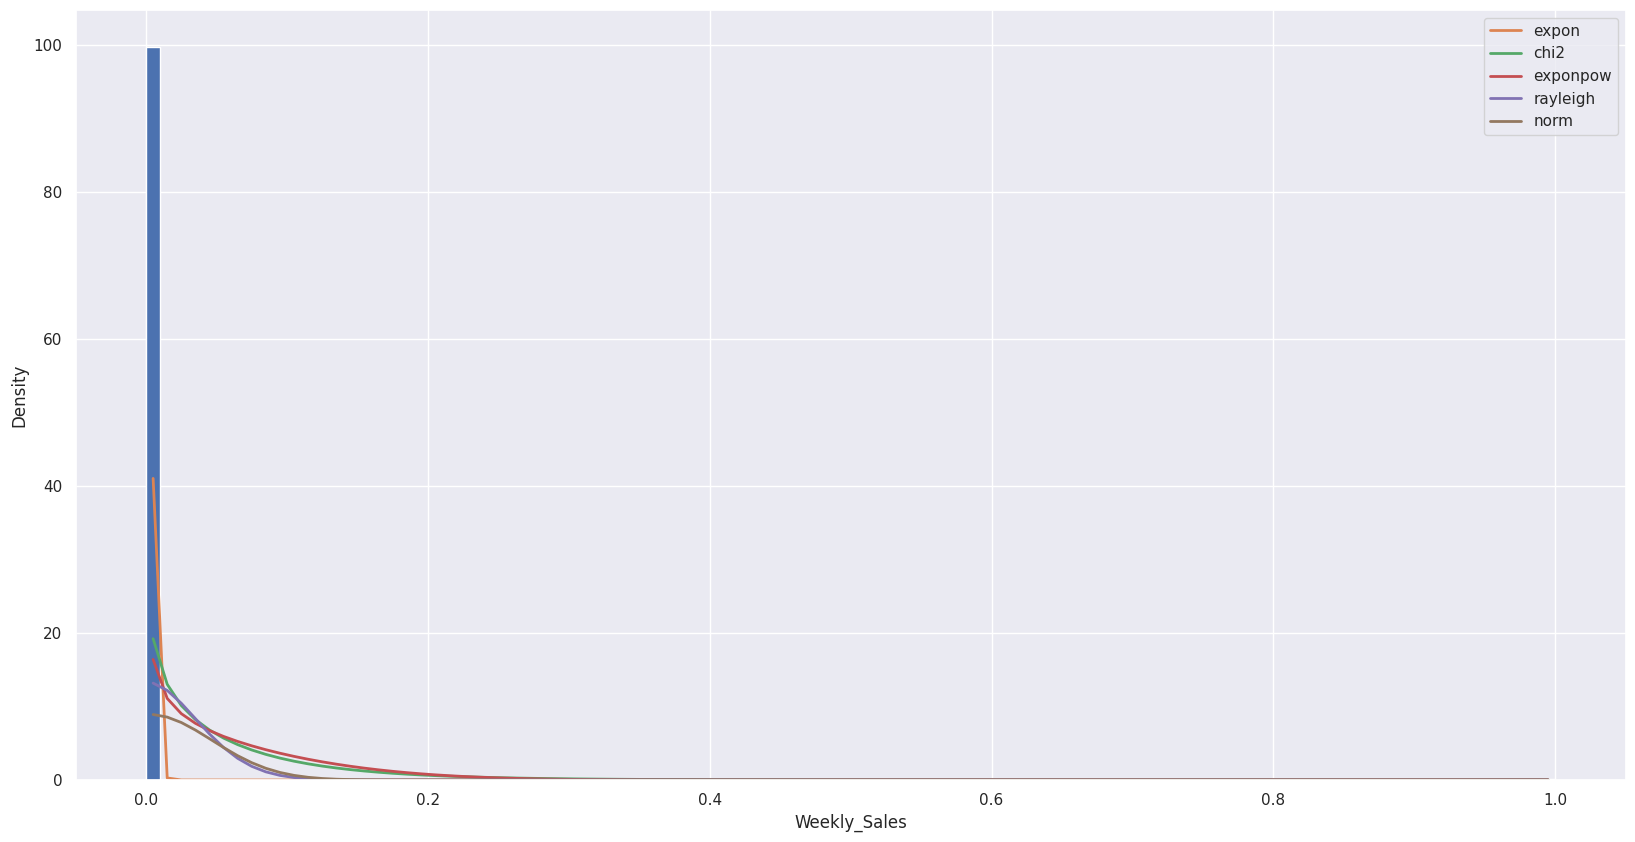

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.36it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm       2706.001646  634.342014   862.953484     inf      0.519361   
exponpow      4095.252390  386.994102  1070.131589     inf      0.529353   
chi2          4675.238889  125.495480  1136.357545     inf      0.530000   
expon         4875.642348   65.761441  1151.128736     inf      0.530000   
uniform       4918.000000    4.000000  1155.453778     inf      0.530000   

              ks_pvalue  
lognorm   5.987512e-126  
exponpow  3.189795e-131  
chi2      1.436546e-131  
expon     1.436546e-131  
uniform   1.436546e-131  


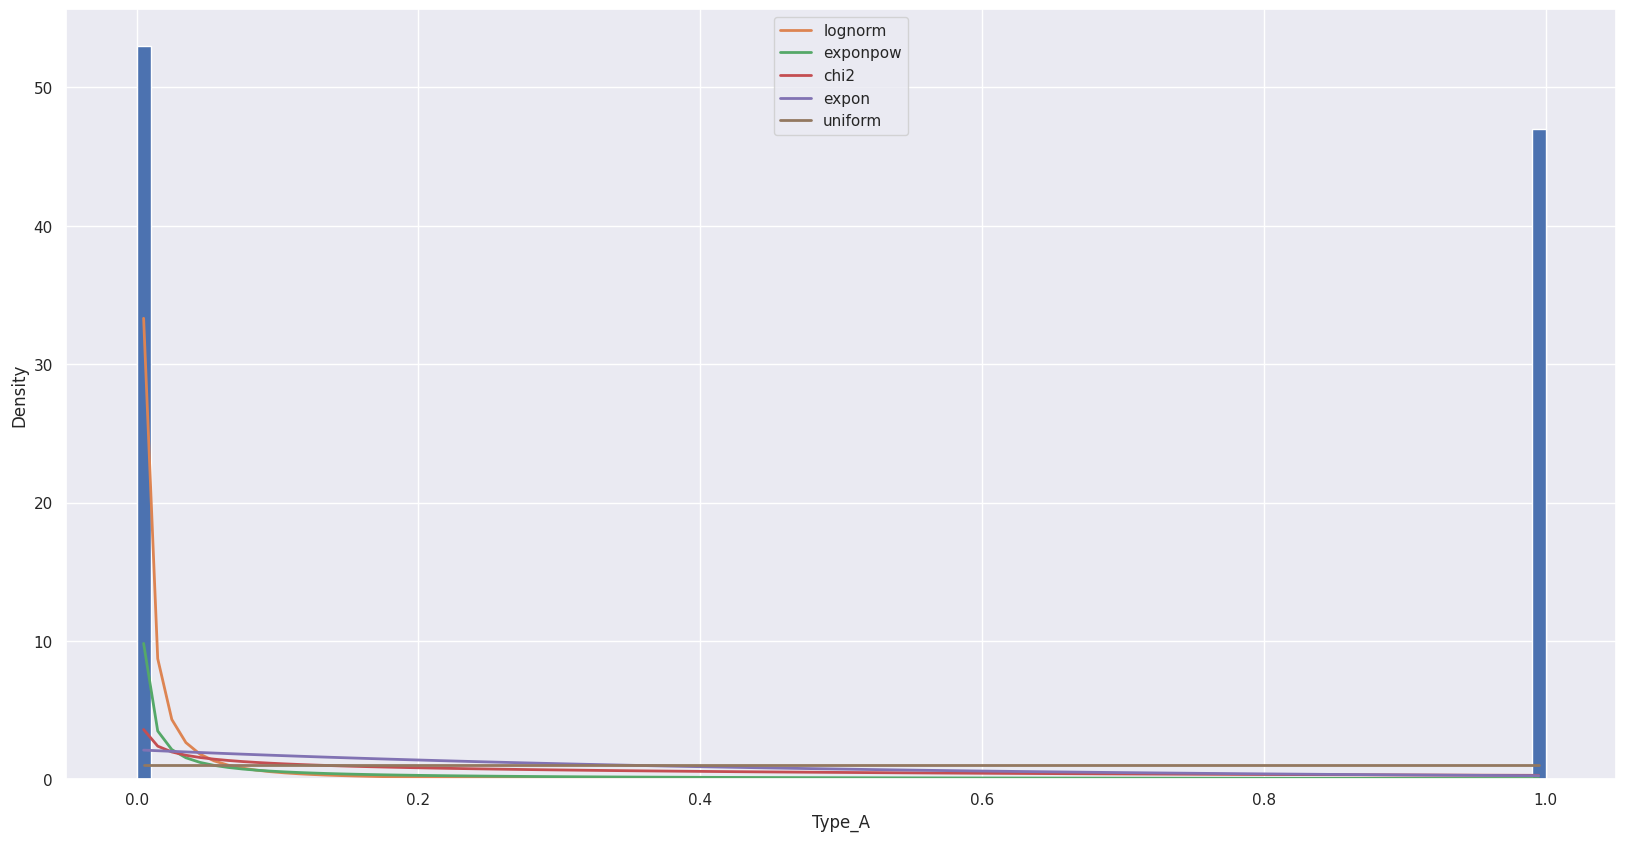

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.21it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      4038.822498  373.586684  1063.194009     inf      0.583522   
gamma         4629.349827  184.167871  1131.425631     inf      0.584000   
chi2          4893.477281  134.888308  1159.168990     inf      0.584000   
expon         4964.611968   68.970612  1160.170377     inf      0.584000   
uniform       5041.120000    4.000000  1167.816946     inf      0.584000   

              ks_pvalue  
exponpow  2.650934e-162  
gamma     1.346769e-162  
chi2      1.346769e-162  
expon     1.346769e-162  
uniform   1.346769e-162  


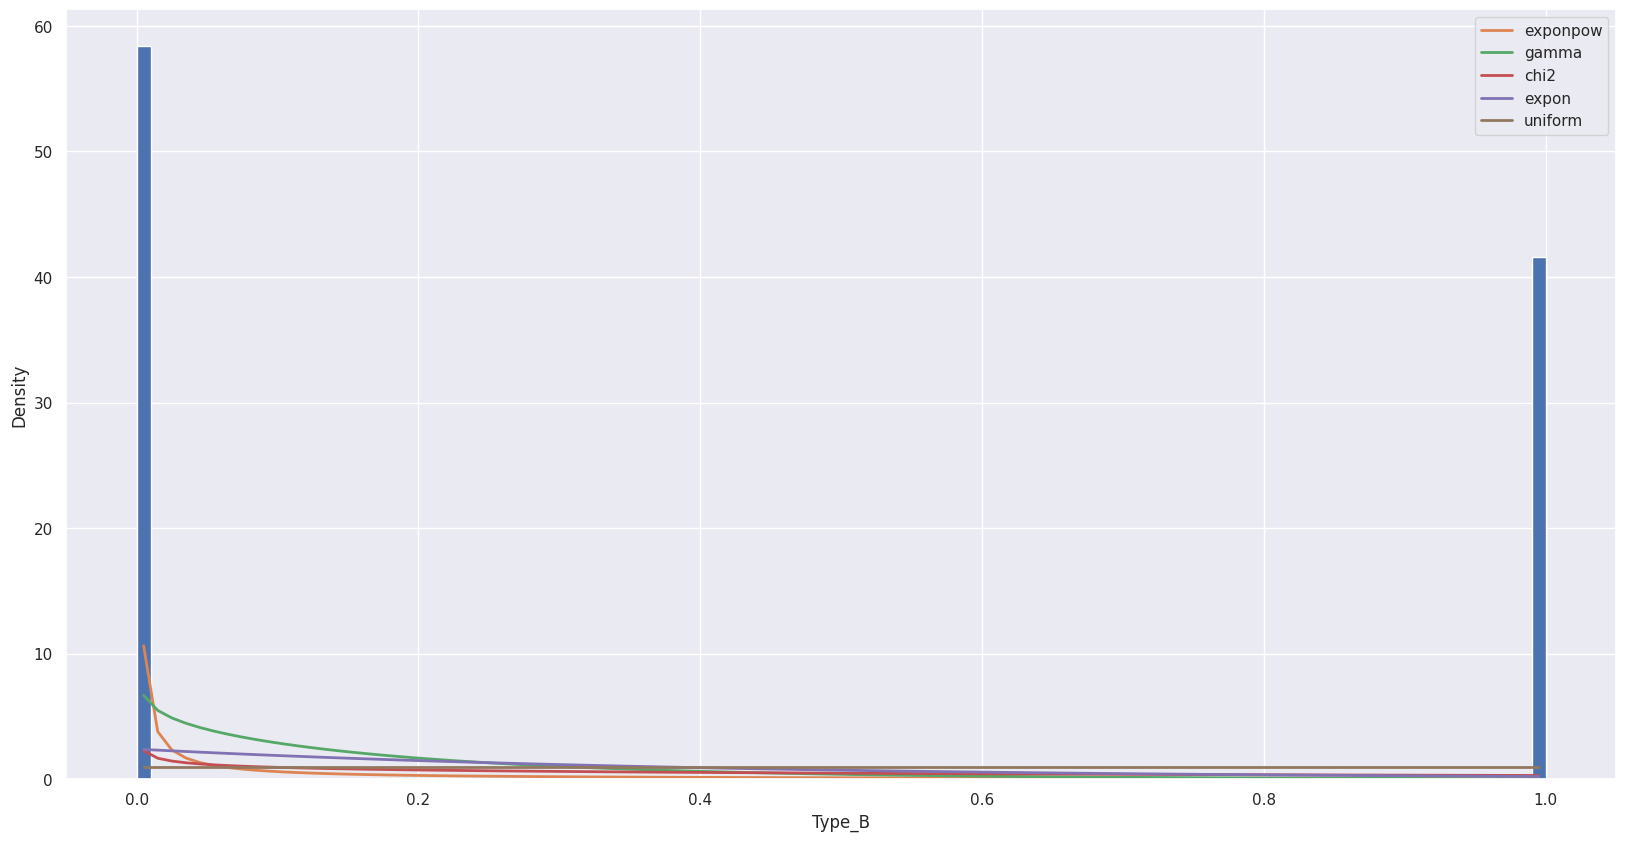

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.35it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         5634.399079  461.088626  1229.662665     inf      0.885400   
exponpow      6824.306170  522.300883  1325.462753     inf      0.867610   
expon         6930.237530  446.881616  1326.949851     inf      0.886000   
chi2          7210.419202   91.676878  1352.980960     inf      0.886000   
rayleigh      7784.375192  195.872751  1385.062079     inf      0.604491   

              ks_pvalue  
gamma      0.000000e+00  
exponpow   0.000000e+00  
expon      0.000000e+00  
chi2       0.000000e+00  
rayleigh  1.513500e-175  


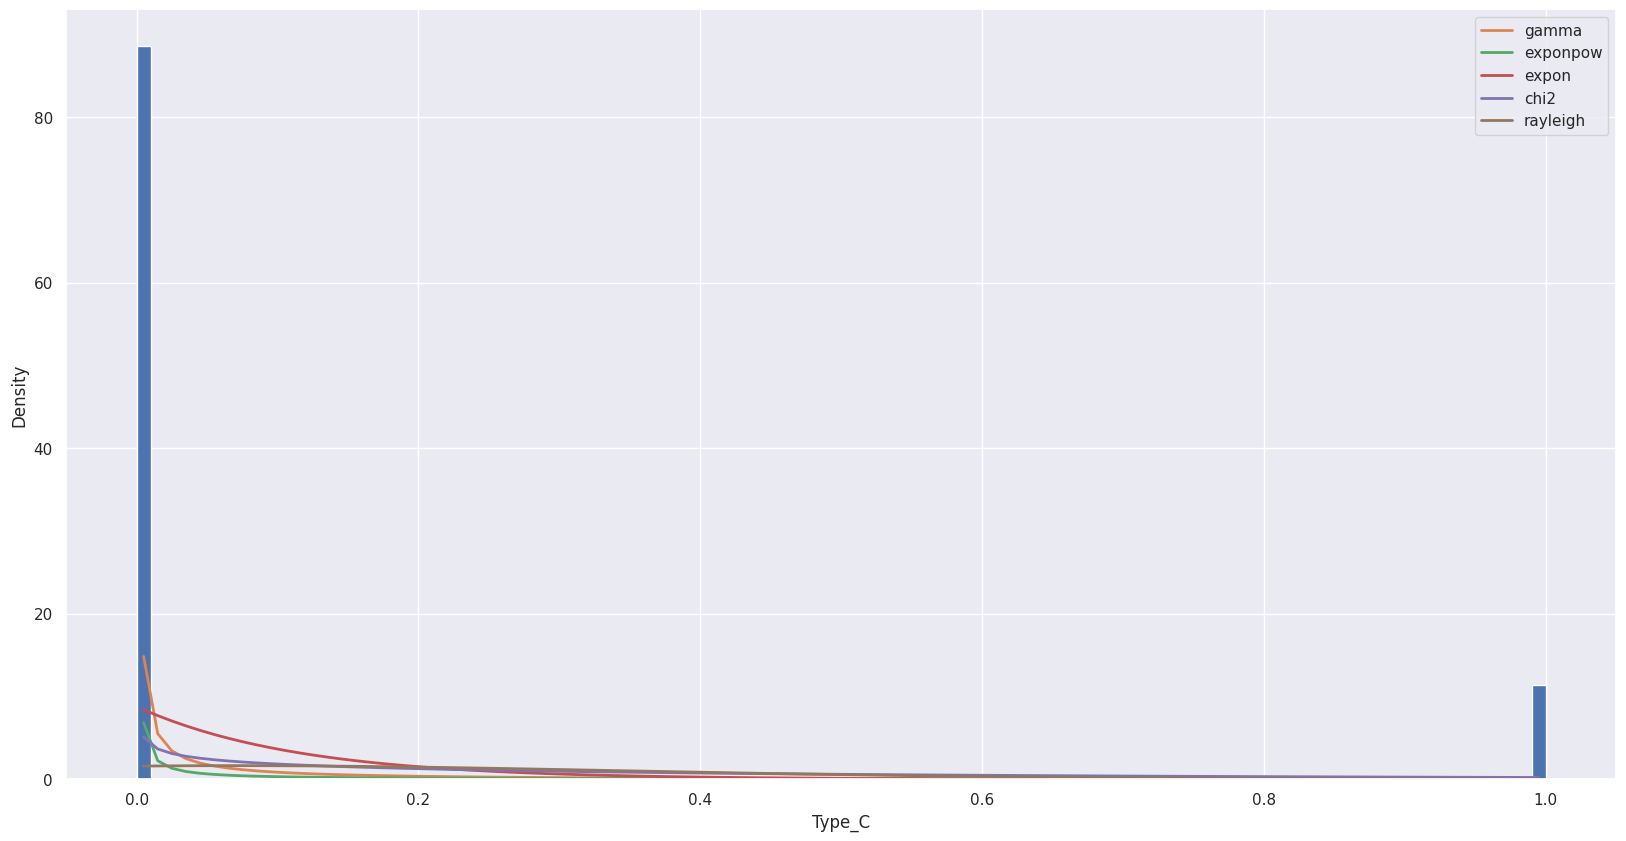

In [15]:
# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Iterate over each column in the data
for i in data.columns:
    values = data[i].dropna().values.astype(int)  # Convert boolean values to integers
    
    # Fit the data to common distributions using the Fitter class
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    
    # Store the summary data in a variable
    summary_data = f.summary()
    
    # Print the summary data
    print(summary_data)
    
    # Plot the fitted distributions
    f.summary(plot=True)
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()

<Axes: >

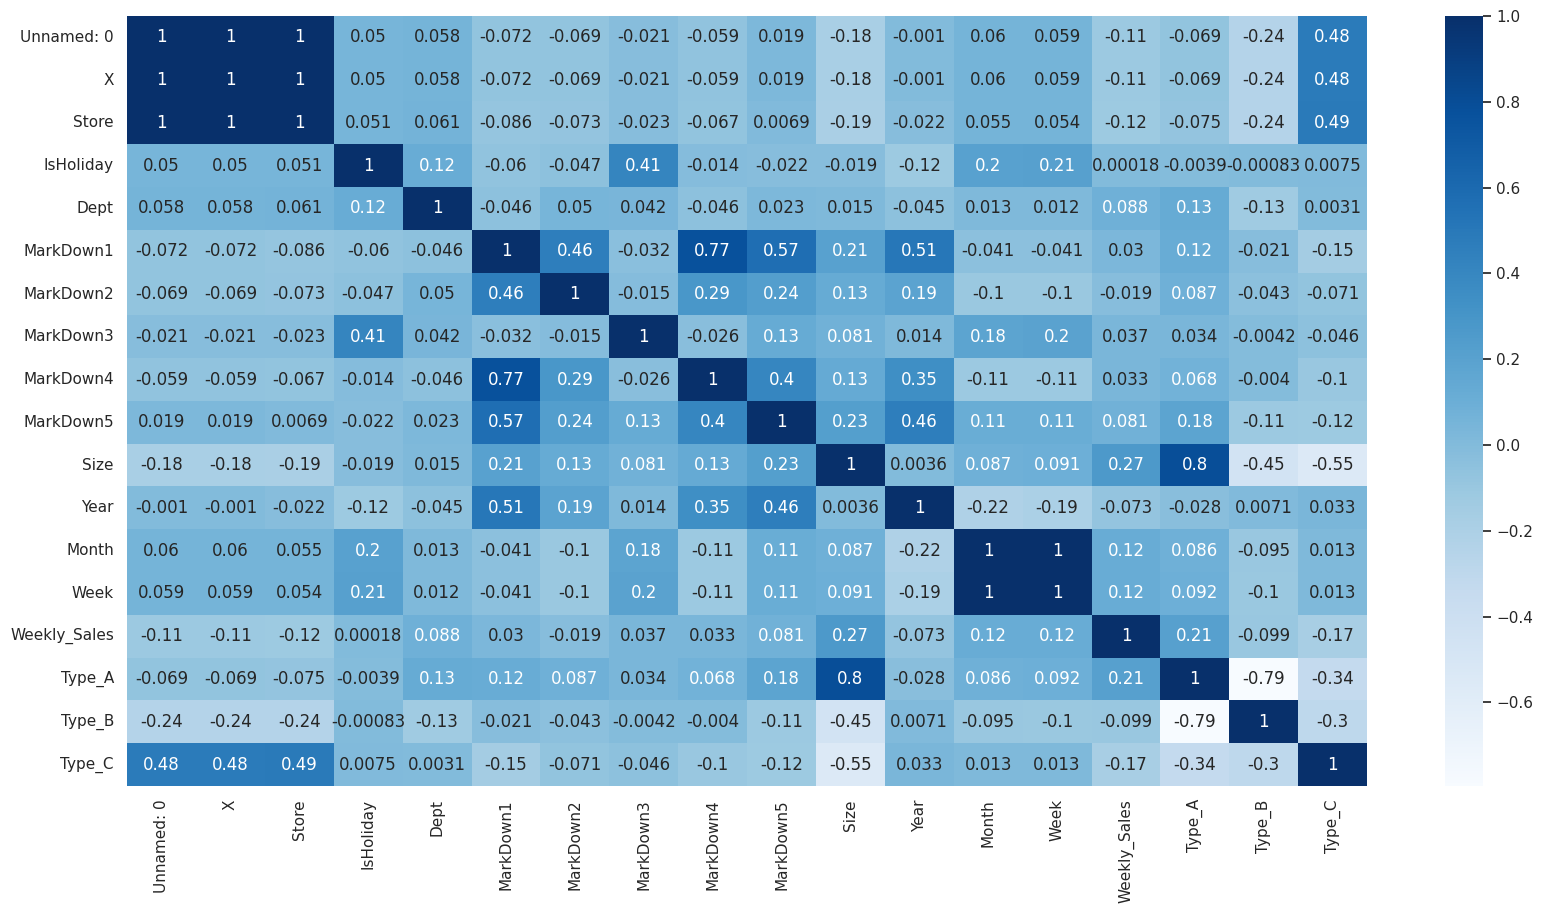

In [16]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    data.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

 **By watching the correlation matrix, we can see that Weekly_Sales have a higher correlation with Store, Dept and Size.**

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(data)

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

#The Ranges of the predictor variables and dependent variable
A box plot is a way of representing the distribution of a dataset by showing the median, quartiles, and outliers. The box in the plot represents the interquartile range (IQR), which is the range of values that lie between the first and third quartiles. The line inside the box represents the median. The whiskers extending from the box show the range of non-outlier values, while the points outside the whiskers indicate outliers.

In [ ]:
names = data[
    ['Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month']
].columns.drop("Weekly_Sales")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="Weekly_Sales",
        data=data[
            ['Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month']
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

#**What kind of data exploration did you do?**
**Preliminary findings from the EDA.**

**Datatype Check** - All the features in the dataset are Integers/ Float / Boolean / Categorical.

**Missing Data Check** - Our Dataset had missing values and they were removed.

**Distribution of training data** - I checked the probability distribution of each and every feature in the training dataset.

**Correlation Check** - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.

**Barplot** - Performed Barplot analysis to findout how a variable impacts the Weekly Sales
The above graphs are a cohesive representation of how Weekly Sales is changing w.r.t. all the significant variables.


**Handling Missing Data**

* In any ML modeling task, one of the very important task is to check if we have any missing values in our dataset. If there are missing values in the dataset it can horribly change the results and make our model inefficient.
* But there are ways to tackle this problem, we will discuss these methods in a bit detail below


**How to handle missing data - Data Imputation techniques**

1. Delete rows with missing data
2. Fill the missing data points by either mean/mode/median
3. Model a regression with rest of the feature as input and the missing value as the target i.e. MICE Imputation

Our dataset had missing values,which was removed but still we deliberately create some missing values and have a comparative analysis of how effectively each method is recovering the data back.

We will remove 1%, 5% and 10% of the data from Weekly Sales in our dataset and see how well Mean Imputation and MICE imputation will recover the data back

In [ ]:
df_imputation = data.copy()
# Creating three extra coloumns of Weekly_Sales for performing Data Imputation techniques
df_imputation["Weekly_Sales_1_percent"] = df_imputation[["Weekly_Sales"]]
df_imputation["Weekly_Sales_5_percent"] = df_imputation[["Weekly_Sales"]]
df_imputation["Weekly_Sales_10_percent"] = df_imputation[["Weekly_Sales"]]

#df_number = data[['Weekly_Sales']]
#df_number['number_copy_1_percent'] = df_number[['Weekly_Sales']]
#df_number['number_copy_5_percent'] = df_number[['Weekly_Sales']]
#df_number['number_copy_10_percent'] = df_number[['Weekly_Sales']]
#df_number['sample_num'] = data[['Store']]
#df_number['sample_num'] = df_number['sample_num']/1000
#df_number

In [ ]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Weekly_Sales_1_percent"] = mm_impute_train_df[
        "Weekly_Sales_1_percent"
    ].fillna(mm_impute_train_df["Weekly_Sales"].mean())
    mm_impute_train_df["Weekly_Sales_5_percent"] = mm_impute_train_df[
        "Weekly_Sales_5_percent"
    ].fillna(mm_impute_train_df["Weekly_Sales"].mean())
    mm_impute_train_df["Weekly_Sales_10_percent"] = mm_impute_train_df[
        "Weekly_Sales_10_percent"
    ].fillna(mm_impute_train_df["Weekly_Sales"].mean())
    return mm_impute_train_df


# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [ ]:
# Checking for % missing values in dataset
print(get_percent_missing(df_imputation))

In [ ]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(df_imputation, 0.01, "Weekly_Sales_1_percent")
create_missing(df_imputation, 0.05, "Weekly_Sales_5_percent")
create_missing(df_imputation, 0.1, "Weekly_Sales_10_percent")

In [ ]:
# Performing Mean Imputation
mm_imputed_df_imputation = mean_impute(df_imputation)

**For MICE imputation, we have to be carefull and create three different dataframes for all three configuration, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity which will mislead the regression model and result in bad imputation**


In [ ]:
# Dataframe for 1% missing value
df_imputation_1_percent = df_imputation.drop(
    ["Weekly_Sales", "Weekly_Sales_5_percent", "Weekly_Sales_10_percent"], axis=1
)
# Dataframe for 5% missing value
df_imputation_5_percent = df_imputation.drop(
    ["Weekly_Sales", "Weekly_Sales_1_percent", "Weekly_Sales_10_percent"], axis=1
)
# Dataframe for 10% missing value
df_imputation_10_percent = df_imputation.drop(
    ["Weekly_Sales", "Weekly_Sales_1_percent", "Weekly_Sales_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
mice_imputed_df_imputation_1_percent = mice_impute(df_imputation_1_percent)
# Performing Imputation on Dataframe with 5% missing values
mice_imputed_df_imputation_5_percent = mice_impute(df_imputation_5_percent)
# Performing Imputation on Dataframe with 10% missing values
mice_imputed_df_imputation_10_percent = mice_impute(df_imputation_10_percent)


**Lets see how our imputation methods have recovered the data**

In [ ]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Weekly_Sales"],
        mm_imputed_df_imputation["Weekly_Sales_1_percent"],
    )
)

# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Weekly_Sales"],
        mice_imputed_df_imputation_1_percent["Weekly_Sales_1_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Weekly_Sales"],
        mm_imputed_df_imputation["Weekly_Sales_5_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Weekly_Sales"],
        mice_imputed_df_imputation_5_percent["Weekly_Sales_5_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Weekly_Sales"],
        mm_imputed_df_imputation["Weekly_Sales_10_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Weekly_Sales"],
        mice_imputed_df_imputation_10_percent["Weekly_Sales_10_percent"],
    )
)

#**Interpreting the Imputation Methods**
* From the above 6 readings we can conclude that the MICE imputation works well when compared to the Mean imputation method as the imputed value is a function of rest of the features.
* We can also observe that the % error of residuals increase as the missing data points increase. From this we can conclude that if we have less missing data in the dataset, more perfectly it is imputed back by the imputation method.

#**Why Imputing data is always better than deleting the row ?**
* For obvious reason - Data Loss. When we delete a row we end up deleting a sample from training data which will do more harm to the model instead of doing any good.
* Selecting of imputation method is really a personal choice, although from the above analysis we can come to the conclusion that MICE does a better job in getting the databack, but after creating a model it hardly has any positive effects on the accuracy of model. But it is always a better choice to use MICE as it can give you the closest possible value.

#**Feature Importance and Selection**
* Lets fit a very simple linear model to understand how the features of walmart dataset is affecting by weekly sales

In [ ]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = data[['Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month']].drop("Weekly_Sales", axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, data.Weekly_Sales), 1)


In [ ]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "Weekly_Sales ~ Store + Dept + Size + Year + Month",
    data=df_norm,
).fit()
print(results.summary())  # OLS Linear Model Summary

**So we can conclude that P value for Dept, Size, Month is less than 0.05**

#**Feature Selection**
Feature Selection is the process of selecting the features which are relevant to a machine learning model. It means that you select only those attributes that have a significant effect on the modelâ€™s output.

Consider the case when you go to the departmental store to buy grocery items. A product has a lot of information on it, i.e., product, category, expiry date, retail cost, ingredients, and manufacturing details. All this information is the features of the product. Normally, you check the brand, retail cost, expiry date, weather the item is vegetarian or not before buying a product. However, manufacturing section is not your concern. Therefore, brand, retail cost, expiry date, vegetraian/non-vegetarian are relevant features, and the manufacturing details are irrelevant. This is how feature selection is done.

#**Null-Hypothesis**
**For Example:- Testing the efficacy of a new Vaccine**

Any new vaccine manufacturer has to conduct a double blind clinical controlled trials to check the efficacy of any vaccine in the general population. Now to test the vaccine, manufacturer will likely recruite around 60k people from all over the population where 30k would be vaccinated by a vaccine and rest 30k would be given a placebo. After few months the it was found that 500 people from vaccinated group got the diesease whereas 10000 people from placebo group got the dieases. This translate to a vaccine efficacy of 95%. i.e. those who received the vaccine were at a 95% lower risk of developing disease than the group who received the placebo. Now, this finding on a subset of 60k individuals is generalized over the whole population of man kind. These assumption is known as Null-Hypothesis.

Statistically, this can be achieved by P-Value.

**P-Value** - It stands for â€˜probability valueâ€™; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis. 


In [ ]:
df_norm_feature_selected = df_norm[
    [
        'Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month'
    ]
]


In [ ]:
results2 = smf.ols(
    "Weekly_Sales ~ Store + Dept + Size + Year + Month",
    data=df_norm_feature_selected,
).fit()
print(results2.summary())  # OLS Linear Model Summary

In [ ]:
predicted_Weekly_sales_1 = results.predict(
    df_norm[
        [
            'Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month',
        ]
    ]
)


In [ ]:
df_norm["predicted_Weekly_sales_1"] = predicted_Weekly_sales_1.round()
predicted_Weekly_sales_2 = results2.predict(
    df_norm_feature_selected[
        [
            'Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month',
        ]
    ]
)
df_norm_feature_selected["predicted_Weekly_sales_2"] = predicted_Weekly_sales_2.round()

In [ ]:
print(
    "Accuracy of predicting the correct weekly sales using all features = ",
    100 - percentage_change(df_norm["Weekly_Sales"], df_norm["predicted_Weekly_sales_1"]),
)
print(
    "Accuracy of predicting the correct weekly sales using only significant features is = ",
    100
    - percentage_change(
        df_norm_feature_selected["Weekly_Sales"],
        df_norm_feature_selected["predicted_Weekly_sales_2"],
    ),
)

* From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features.

* From the above two interpretations, our observation is that in both the cases our model predicts the weekly sales pretty good and they are pretty close to each other. Model who uses all features slighly overcomes the model who is using only the statistically important features with and accuracy of 92.432% compared to the 92.43 % of the later.

* From the above studies let's stick to the data with all featues and try using different models

In [ ]:
df_norm = df_norm.drop(["predicted_Weekly_Sales_1"], axis=1)

In [ ]:
X = df_norm.drop(["Weekly_Sales"], axis=1)  # Training Feature
Y = df_norm["Weekly_Sales"]  # Target

How did you split the data into train, and test?
The data was splitted into Training ad Testing Data into 90% and 10% respectively.



In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

Fitting a Linear Model

In [ ]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

In [ ]:
y_linear_predictions = linear_model.predict(x_test).round()


Fitting a Tree Based Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

In [ ]:
y_tree_based_predictions = tree_model.predict(x_test).round()

Fitting a Support Vector Machine (SVM)


In [ ]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test).round()

Fitting a MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
mlp_predictions = regr.predict(x_test).round()

Using AutoML to find out the best Model

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

In [ ]:
walmart_hf = h2o.H2OFrame(data)  # Converting Pandas dataframe in H2O dataframe

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = walmart_hf.split_frame([pct_rows])

In [ ]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "Weekly_Sales"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [ ]:

autoML = autoML(df_train, df_test)  # Training AutoML

In [ ]:
autoML[2].leaderboard  # Leaderbord of AutoML output

In [ ]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model

In [ ]:
autoML_best_predictions = autoML_model.predict(df_test).round()

In [ ]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["Weekly_Sales"], use_pandas=False)

In [ ]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [ ]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

Hyperparameter Tuning of AutoML's Best Model

In [ ]:
train, validate, test = np.split(
    data.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="Weekly_Sales",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

#**What evaluation metric are you using?**
The evaluation metrics which I am using are

* Mean Squared Error
* Root Mean Squared Error
* Mean Absolute Error
* Mean Residual Deviance

Accuracy
These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

Accuracy tells us how correct and precise our model is.

How do training, validation, and test metrics compare?
The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.

As the Mean Residual Deviance of this model on training and validation dataset is ~0.3929 and ~0.3534 respectively. Also, the other metrics on both of the dataset validates that the model is not overfitting the Training Data. Please refer below to see the Evaluation Metrics on both training and validation dataset.


In [ ]:
best_drf_model

In [ ]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["Weekly_Sales"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

Which models did you explore and did you try to tune the hyperparameters of the best model you got?
I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were

Linear Regressor
Random Forest Regressor
MLP Regressor
Support Vector Machine(SVM) Regressor
AutoML
The models which gave me the best performance in predicting the quality of wine were the SVM and the model from AutoML where the model from AutoML slightly outpaced the SVM. The model from AutoML to give the best result was a RandomForestRegressor.

As the AutoML's model was promising, I tuned its hyperparameters to oprimize the model. Tunining the hyperparameters helped the model to incease its accuracy from 93.25 % to 96.08 % which is a great increase in the performance.


In [ ]:

print(
    "Accuracy of predicting the correct quality of wine using MLP Regressor = ",
    100 - percentage_change(y_test, mlp_predictions),
)
print(
    "Accuracy of predicting the correct quality of wine using Linear Model = ",
    100 - percentage_change(y_test, y_linear_predictions),
)
print(
    "Accuracy of predicting the correct quality of wine using Tree Based Model = ",
    100 - percentage_change(y_test, y_tree_based_predictions),
)
print(
    "Accuracy of predicting the correct quality of wine using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of predicting the correct quality of wine using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of predicting the correct quality of wine using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

Model Selection
From the above summary of the models trained on the dataset, the two best models are SVM and AutoML's best model with tuned hyperparameters.

SVM Regressor with an Accuracy of ~ 93.37%
AutoML's Hyperparameter Tuned Version ~ 96.20%
Let's try to understand how both the models have been trained.

Interpreting SVM Regressor using SHAP values

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of fixed_acidity

The cross is made at approx E[f(x)] 5.74
So as the fixed_acidity increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.


In [ ]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

In [ ]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

Interpreting SHAP Feature Importance Plot for Linear and Tree-based model

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plot is

SHAP feature importance plot for SVM model
Using the below plot we can come on the conclusion that the alcohol is the most important feature, followed by volatile_acidity and sulphate.



In [ ]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="blue")

In [ ]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)


Interpreting Waterfall SHAP visualization
Let's consider the same sample (sample_ind = 18).
It says that f(x) = 5.9 is what we got as a model output and the expected output for this sample was 5.725. We came pretty close to determining it as the difference is only 0.175. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that volatile_acidity has the biggest and most positive impact in increasing the quality of wine by 0.12 for this specific sample. Followed by alcohol had a negative impact and it bought the quality of wine down again by 0.06 for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 5.725

In [ ]:
get_SHAP()

Interpret the summary plot SVM Model
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a feature of a wine
Red color represents high values whereas blue color represents low value
If a dot(a feature of wine) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot(a feature of wine) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.
Let us try to understand how the features are affecting the model.

Higher value of alcohol tends to have a positive impact on the quality of wine
Lower values of volatile_acidity tend to have a positive impact on the quality of the wine.
Higher values of sulfates tends to have a positive impact on the quality of wine
Lower value of total_sulphur_dioxide tends to have a positive impact on the quality of wine, and so on.
We could also interpret the intensity of impact

Higher amount of sulfates have a much positive impact on the quality of the wine but it doesn't really care if the value is low it will always have the same intensity of negative impact on the quality
This visualization is very useful when it comes to interpreting how our model is working.

In [ ]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

Heatmap Visualization for Linear and Tree-based model
This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(quality of wine).
Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is


In [ ]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model

In [ ]:
# PDP Plot for Tree based Model
PartialDependenceDisplay.from_estimator(regr, x_test, x_test.columns )

fig = plt.gcf()
fig.suptitle("Partial dependence of Wine Quality Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)
     

Interpreting AutoML's best model with tuned hyperparameters
How are errors/residuals distributed and how interpretable is your model ?
Residual Analysis

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.
Variable Importance

In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding
SHAP Summary

From the SHAP summary diagram, we can interpret a few conclusions -

All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by volatile_acidity, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.
The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of alcohol results in high quality of wine, a low amount of volatile acidity results in high quality of wine, and so on. As we can see the distribution of red points in the Alcohol feature is far more spread than the blue points. From this visual, we can interpret that the quality of wine vastly increases as the amount of alcohol increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Inversely for the Volatile Acidity, less is better for the quality of the wine. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the quality of the wine.
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

Partial Dependence Plot (PDP)

A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP. For Interpretation purposes, let us pick up the two most important variables - Alcohol and Sulphate.

As we can see that when the rest of the variables are kept constant and a marginal change is made in alcohol, we can see the mean response increases between alcohol levels of 11 and 12. This could be interpreted as this range of alcohol could be the deciding factor in the quality of the wine.
Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of quality going up between the sulfate range of 0.4 to 0.8. Hence, it can be interpreted that this range is deciding factor in the quality of the wine.
The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

ICE (Individual Conditional Expectation) Plot

ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the alcohol and sulfate features, as we interpreted in PDP the quality of wine increases when alcohol and sulfate value is between 11 to 12 and 0.4 to 0.8 respectively. But is this true for every wine in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the quality of a few wines(0th percentile instance) increases a lot in this range while the quality of a few doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.


In [ ]:
best_drf_model.explain(autoML[1])  # AutoML Explainability

Final Takeaways
The AutoML's best model with its Hyperparameter's tuned is the best model for this task as it has the highest accuracy compared to the other models tested in this excercise. Also, this model is interpretible i.e. we can actually get to the root of what made this prediction to come to.


Learning Outcomes
I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning
Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc
Hyperparameter tuning is the second most important thing after data preparation, which most of the practioner's ignore. But the results are worth the time invested
Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks
Model Interpretation(Unboxing the Black Blox) is the best takeaway from the series of this assignments. SHAP, LIME and PDP have made it easier to understand what made a model to predict a outcome.


References
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d